<h1>Machine Learning</h1>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# KNN
from sklearn.neighbors import KNeighborsClassifier

#decision_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#LogisticRegression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

<h2>Models</h2>

In [2]:
# Logistic Regression
def logistic_regression(X_train, y_train):
    clf = LogisticRegression().fit(X_train, y_train)
    return clf

In [3]:
# KNN
def KNN(X_train, y_train):
    best_k = find_best_K(X_train, y_train)
    params = {'n_neighbors':best_k}
    clf = KNeighborsClassifier(n_neighbors=params['n_neighbors']).fit(X_train, y_train)
    print("Best K is:",best_k,"\n")
    return clf

#HyperParameter K
def find_best_K(X_train, y_train):
    parameters = {'n_neighbors':[x for x in range(3,20,2)]}
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_K = clf.best_params_['n_neighbors']
    return best_K

In [4]:
# Desicion Tree
def decision_tree(X_train, y_train):
    best_max_depth, best_min_samples_split = find_best_decision_tree_params(X_train, y_train)
    params = {'max_depth':best_max_depth, 'min_samples_split':best_min_samples_split}
    clf = DecisionTreeClassifier(max_depth=params['max_depth'],
                                 min_samples_split=params['min_samples_split']).fit(X_train, y_train)
    print("Best max depth is:",best_max_depth,"\n")
    print("Best min samples split:",best_min_samples_split,"\n")
    return clf    

#HyperParameter    
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10], 'min_samples_split':[5,10,15,20]}
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt,parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    return best_max_depth, best_min_samples_split

In [5]:
def scale_features(X_train, scale_type):
    
    if scale_type == 'minmax':
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_train_scaled = scaler.fit_transform(X_train)
        
        
    if scale_type == 'standard':
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
    
    
    return scaler, X_train_scaled

In [6]:
def transfer_string_to_numerical_values(dataset,str_cols):
    for col in str_cols:
        le = preprocessing.LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    return dataset  

In [7]:
def split_train_and_test(ML,target_col):
    feature_vector = ML.columns[ML.columns != target_col]
    target_feature = target_col

    X = ML[feature_vector]
    y = ML[target_feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    return X_train, X_test, y_train, y_test

In [8]:
def evo_met(y_test , y_pred,name):   
    evo = metrics.confusion_matrix(y_test , y_pred)
    df_confusion = pd.DataFrame(evo , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
    print("confusion matrix of",name,"is:\n")
    display(df_confusion)

In [9]:
def show_plot(machine,train,test,name,color1,color2):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(machine))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
    rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(name,fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(machine,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    


<h2>DataFrame Preparations</h2>

In [15]:
df = pd.read_csv('machine_learning_data.csv', index_col=0)
df

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Points per Game,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position
0,1,DET,2021,Oklahoma State,1,38,1226,615,207,200,...,16.2,5.4,5.3,-0.2,-0.009,-1.5,0.2,198.120000,99.790240,Point Guard
1,3,CLE,2021,USC,1,40,1376,600,327,106,...,15.0,8.2,2.7,3.5,0.123,1.3,1.1,210.127273,97.522280,Power Forward
2,4,TOR,2021,Florida State,1,37,1311,541,289,127,...,14.6,7.8,3.4,2.9,0.104,0.1,0.7,207.125455,102.965384,Power Forward
3,5,ORL,2021,Gonzaga,1,27,751,347,104,108,...,12.9,3.9,4.0,-1.0,-0.062,-5.0,-0.6,192.116364,92.986360,Point Guard
4,8,ORL,2021,Michigan,1,48,1556,738,228,138,...,15.4,4.8,2.9,2.2,0.069,-1.1,0.3,207.125455,102.058200,Small Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,18.8,2.3,7.4,83.4,0.128,0.4,12.9,183.110909,68.038800,Point Guard
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,8.7,7.5,1.6,27.0,0.066,-0.4,6.3,198.120000,99.336648,Power Forward
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,8.5,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,20.4,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center


In [16]:
data = df.copy()
data

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Points per Game,Total Rebounds per Game,Assists per Game,Win Shares,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,First Position
0,1,DET,2021,Oklahoma State,1,38,1226,615,207,200,...,16.2,5.4,5.3,-0.2,-0.009,-1.5,0.2,198.120000,99.790240,Point Guard
1,3,CLE,2021,USC,1,40,1376,600,327,106,...,15.0,8.2,2.7,3.5,0.123,1.3,1.1,210.127273,97.522280,Power Forward
2,4,TOR,2021,Florida State,1,37,1311,541,289,127,...,14.6,7.8,3.4,2.9,0.104,0.1,0.7,207.125455,102.965384,Power Forward
3,5,ORL,2021,Gonzaga,1,27,751,347,104,108,...,12.9,3.9,4.0,-1.0,-0.062,-5.0,-0.6,192.116364,92.986360,Point Guard
4,8,ORL,2021,Michigan,1,48,1556,738,228,138,...,15.4,4.8,2.9,2.2,0.069,-1.1,0.3,207.125455,102.058200,Small Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,18.8,2.3,7.4,83.4,0.128,0.4,12.9,183.110909,68.038800,Point Guard
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,8.7,7.5,1.6,27.0,0.066,-0.4,6.3,198.120000,99.336648,Power Forward
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,8.5,5.6,1.6,26.3,0.093,-0.2,6.3,183.411091,106.594120,Center
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,20.4,7.9,2.5,82.3,0.177,2.3,24.3,207.125455,106.594120,Center


In [17]:
data=pd.get_dummies(data,columns=['First Position'],prefix="",prefix_sep="")
data

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
0,1,DET,2021,Oklahoma State,1,38,1226,615,207,200,...,-0.009,-1.5,0.2,198.120000,99.790240,0,1,0,0,0
1,3,CLE,2021,USC,1,40,1376,600,327,106,...,0.123,1.3,1.1,210.127273,97.522280,0,0,1,0,0
2,4,TOR,2021,Florida State,1,37,1311,541,289,127,...,0.104,0.1,0.7,207.125455,102.965384,0,0,1,0,0
3,5,ORL,2021,Gonzaga,1,27,751,347,104,108,...,-0.062,-5.0,-0.6,192.116364,92.986360,0,1,0,0,0
4,8,ORL,2021,Michigan,1,48,1556,738,228,138,...,0.069,-1.1,0.3,207.125455,102.058200,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,CIN,1970,Texas-El Paso,13,876,31159,16481,2046,6476,...,0.128,0.4,12.9,183.110909,68.038800,0,1,0,0,0
2060,40,SEA,1970,Oklahoma,11,787,19571,6828,5876,1220,...,0.066,-0.4,6.3,198.120000,99.336648,0,0,1,0,0
2061,103,SDR,1970,St. John's,9,637,13630,5432,3553,1043,...,0.093,-0.2,6.3,183.411091,106.594120,1,0,0,0,0
2063,122,DET,1970,Kentucky,9,718,22342,14659,5707,1804,...,0.177,2.3,24.3,207.125455,106.594120,1,0,0,0,0


In [18]:
df2=transfer_string_to_numerical_values(data,["Teams","College"])
df2

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
0,1,13,2021,158,1,38,1226,615,207,200,...,-0.009,-1.5,0.2,198.120000,99.790240,0,1,0,0,0
1,3,10,2021,230,1,40,1376,600,327,106,...,0.123,1.3,1.1,210.127273,97.522280,0,0,1,0,0
2,4,42,2021,61,1,37,1311,541,289,127,...,0.104,0.1,0.7,207.125455,102.965384,0,0,1,0,0
3,5,32,2021,70,1,27,751,347,104,108,...,-0.062,-5.0,-0.6,192.116364,92.986360,0,1,0,0,0
4,8,32,2021,124,1,48,1556,738,228,138,...,0.069,-1.1,0.3,207.125455,102.058200,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,9,1970,215,13,876,31159,16481,2046,6476,...,0.128,0.4,12.9,183.110909,68.038800,0,1,0,0,0
2060,40,40,1970,156,11,787,19571,6828,5876,1220,...,0.066,-0.4,6.3,198.120000,99.336648,0,0,1,0,0
2061,103,39,1970,200,9,637,13630,5432,3553,1043,...,0.093,-0.2,6.3,183.411091,106.594120,1,0,0,0,0
2063,122,13,1970,98,9,718,22342,14659,5707,1804,...,0.177,2.3,24.3,207.125455,106.594120,1,0,0,0,0


In [19]:
#Normalize 
column_names_to_normalize = ['Minutes Played', 'Points', 'Total Rebounds', 'Assists',
       'Field Goal %', '3 Point Field Goal %', 'Free Throw %',
       'Minutes Played per Game', 'Points per Game', 'Total Rebounds per Game',
       'Assists per Game', 'Win Shares', 'Win Shares per 48 Minutes', 'Box +-',
       'VORP', 'Height', 'Weight']
min_max_scaler = preprocessing.MinMaxScaler()
x = data[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df2.index)
df2[column_names_to_normalize] = df_temp
df2

,Overall Pick,Teams,year,College,Seasons in NBA,# Games,Minutes Played,Points,Total Rebounds,Assists,...,Win Shares per 48 Minutes,Box +-,VORP,Height,Weight,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
0,1,13,2021,158,1,38,0.022298,0.016654,0.013717,0.012653,...,0.299389,0.313316,0.064568,0.576923,0.453125,0,1,0,0,0
1,3,10,2021,230,1,40,0.025032,0.016248,0.021669,0.006706,...,0.366599,0.349869,0.071832,0.730769,0.427083,0,0,1,0,0
2,4,42,2021,61,1,37,0.023847,0.014650,0.019150,0.008035,...,0.356925,0.334204,0.068604,0.692308,0.489583,0,0,1,0,0
3,5,32,2021,70,1,27,0.013637,0.009397,0.006892,0.006833,...,0.272403,0.267624,0.058111,0.500000,0.375000,0,1,0,0,0
4,8,32,2021,124,1,48,0.028314,0.019985,0.015108,0.008731,...,0.339104,0.318538,0.065375,0.692308,0.479167,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,19,9,1970,215,13,876,0.568032,0.446301,0.135577,0.409718,...,0.369145,0.338120,0.167070,0.384615,0.088542,0,1,0,0,0
2060,40,40,1970,156,11,787,0.356761,0.184900,0.389371,0.077186,...,0.337576,0.327676,0.113801,0.576923,0.447917,0,0,1,0,0
2061,103,39,1970,200,9,637,0.248446,0.147097,0.235438,0.065988,...,0.351324,0.330287,0.113801,0.388462,0.531250,1,0,0,0,0
2063,122,13,1970,98,9,718,0.407282,0.396962,0.378172,0.114134,...,0.394094,0.362924,0.259080,0.692308,0.531250,1,0,0,0,0


In [20]:

df_point=df2.drop(["Power Forward","Small Forward","Center","Shooting Guard"],axis=1)
df_power=df2.drop(["Point Guard","Small Forward","Center","Shooting Guard"],axis=1)
df_small=df2.drop(["Point Guard","Power Forward","Center","Shooting Guard"],axis=1)
df_center=df2.drop(["Point Guard","Power Forward","Small Forward","Shooting Guard"],axis=1)
df_shooting=df2.drop(["Point Guard","Power Forward","Small Forward","Center"],axis=1)


<h3>Point Guard</h3>

<b>KNN</b>

Best K is: 7 

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,1271,26
Actual Positive,64,266


confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,321,15
Actual Positive,18,53


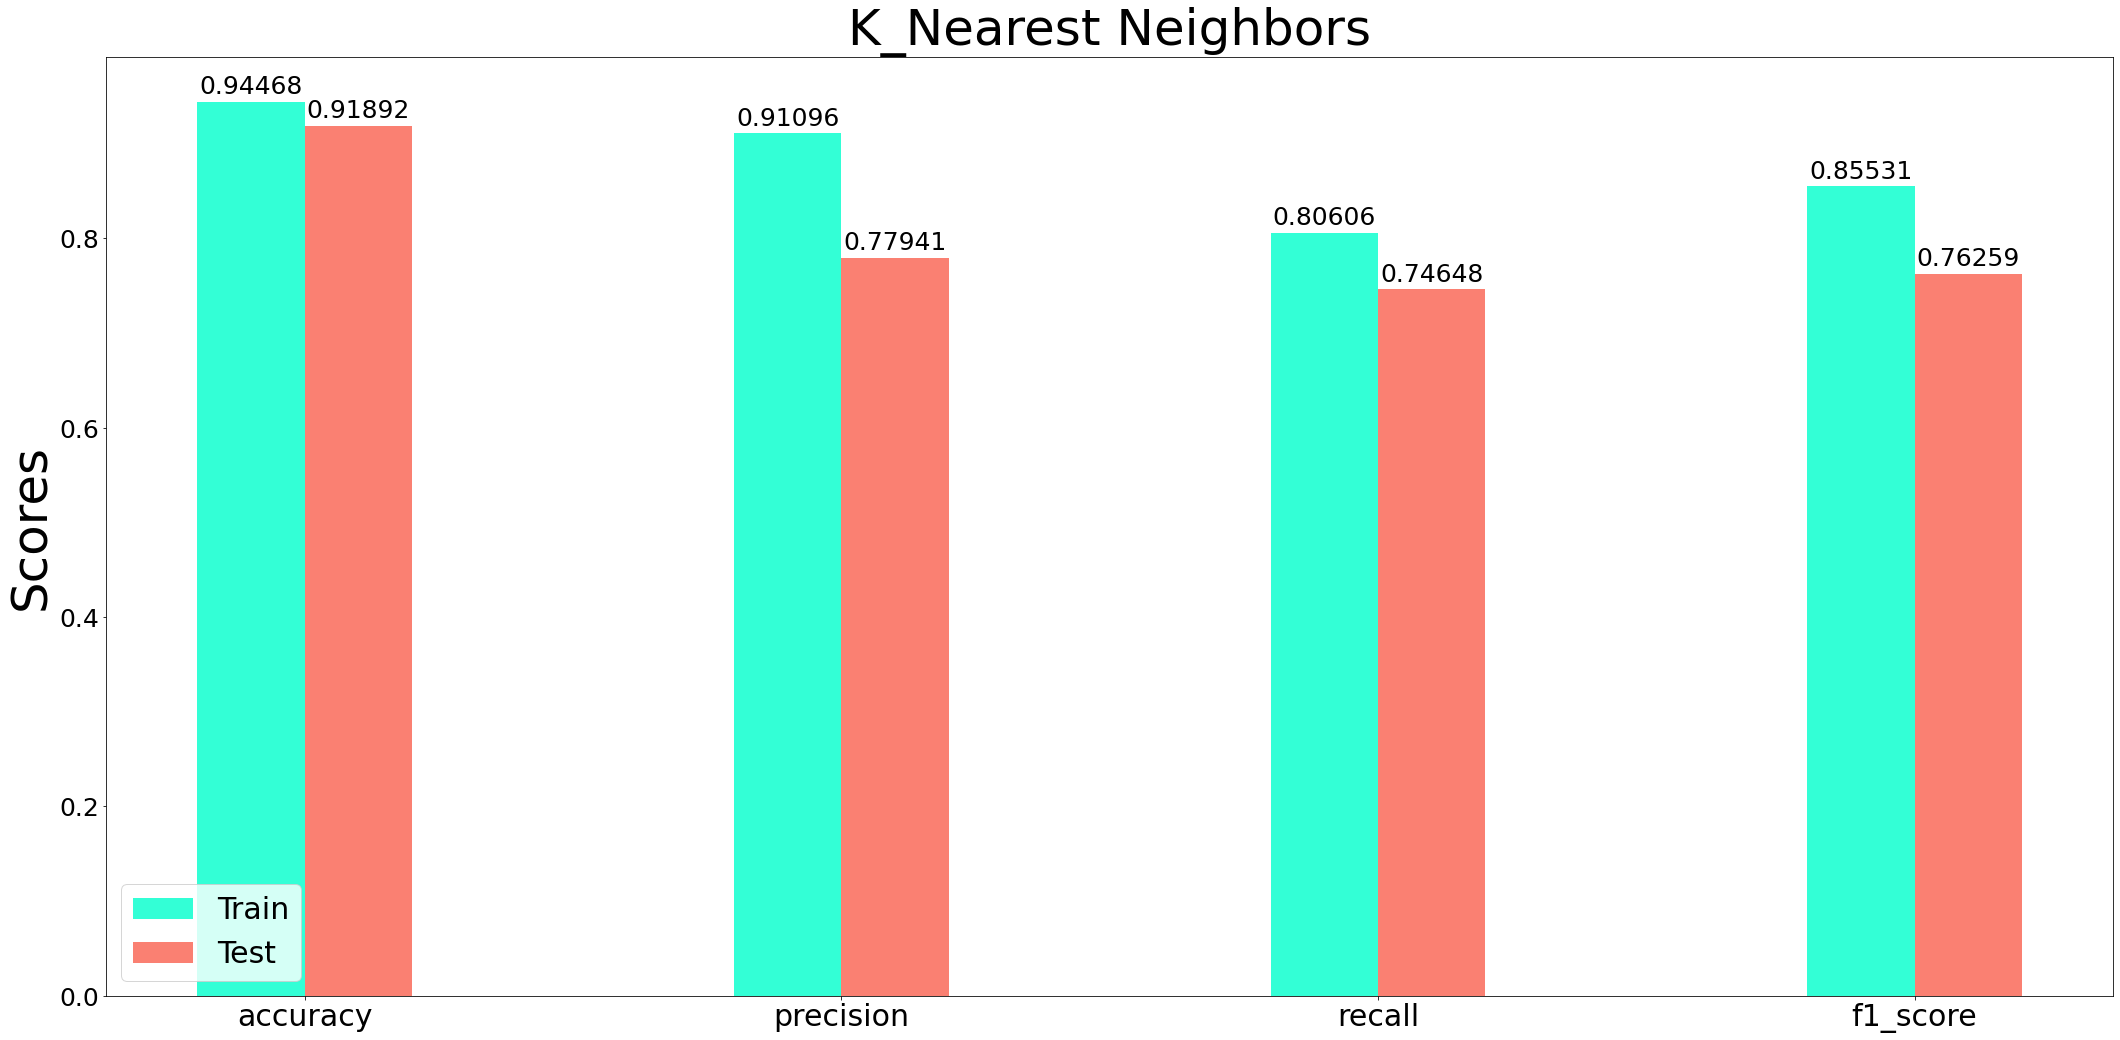

In [21]:
X_train, X_test, y_train, y_test=split_train_and_test(df_point,"Point Guard")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

knn_clf = KNN(X_scale_train, y_train)

knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train),5))
evo_met(y_train, knn_y_pred_train,'KNN train')

knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
show_plot(category,knn_train,knn_test,'K_Nearest Neighbors','#33ffd6','salmon')

<b>Logistic Regression</b>

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,1273,24
Actual Positive,40,290


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,328,8
Actual Positive,6,65


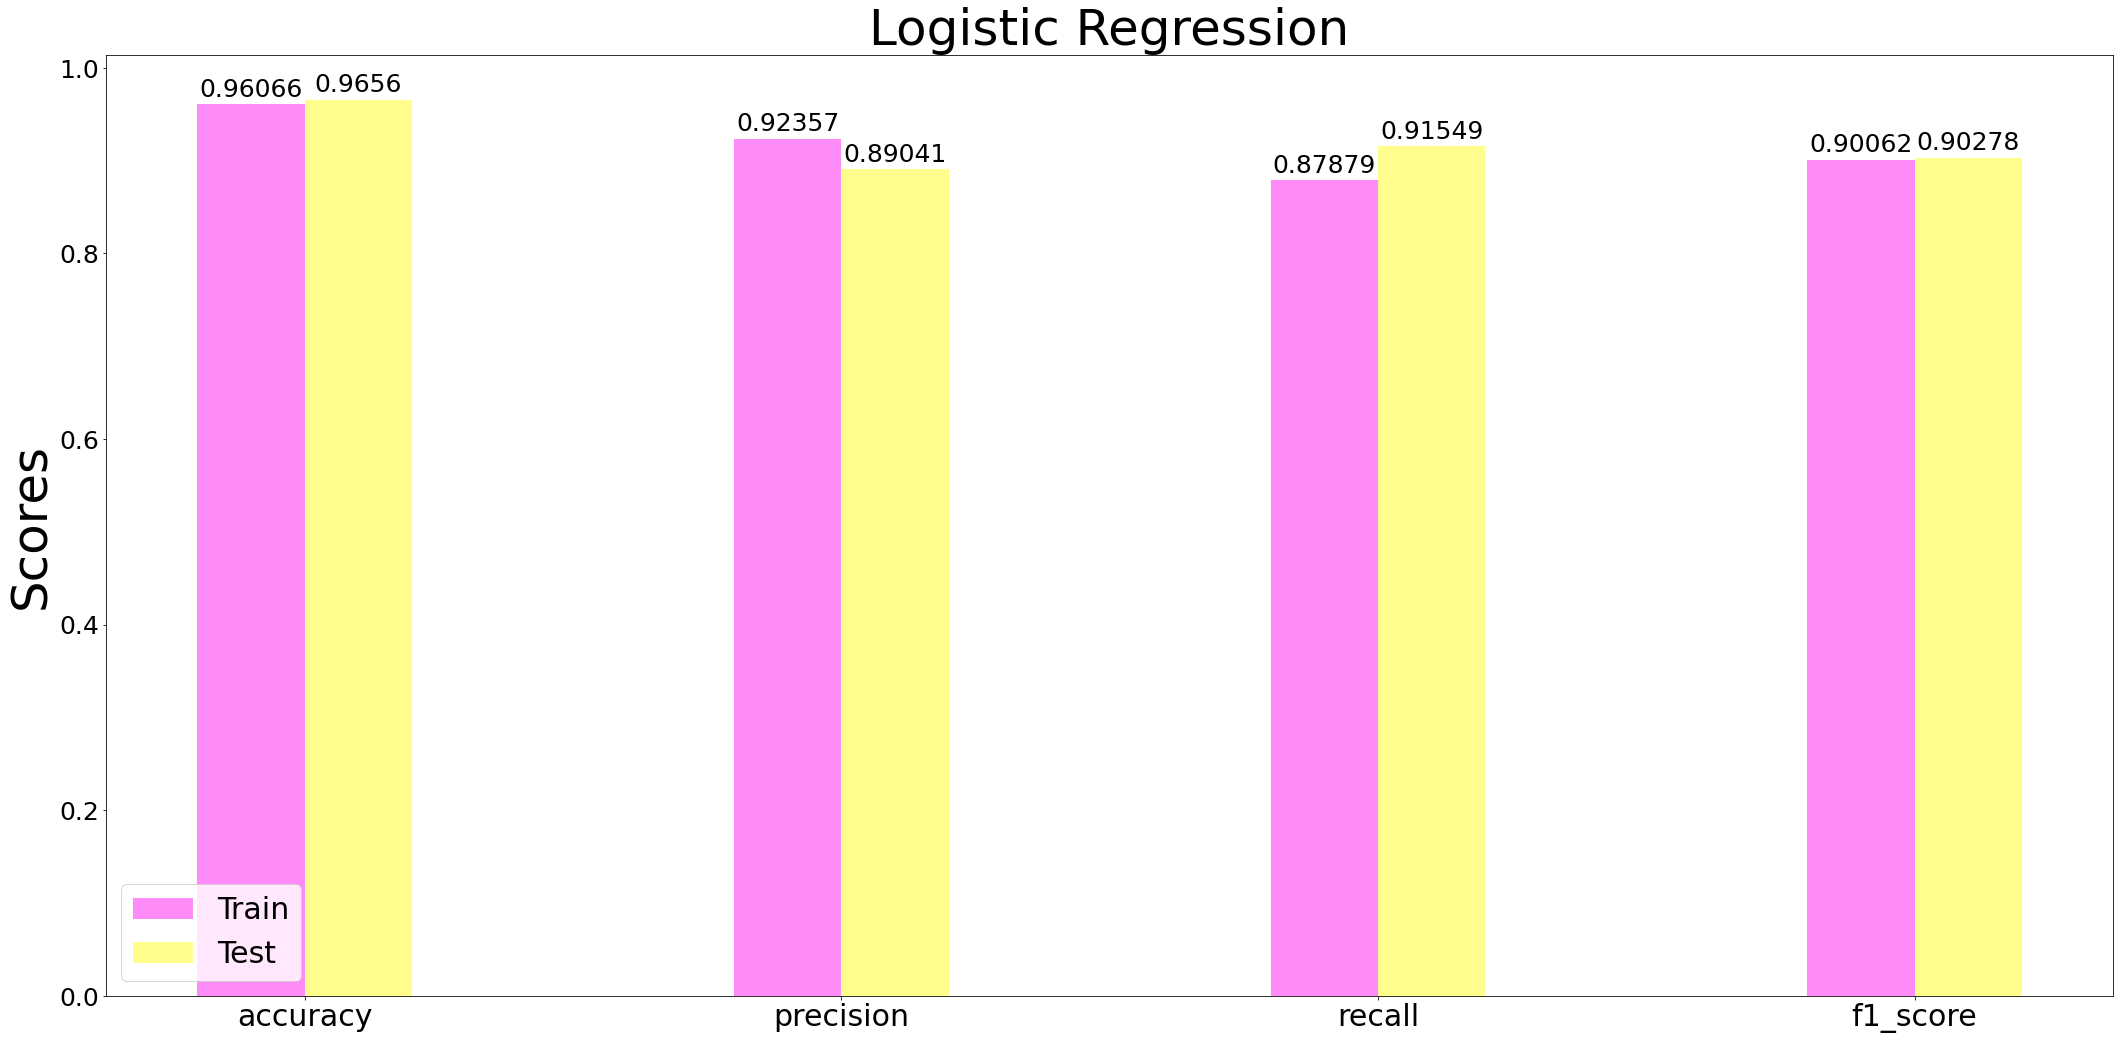

In [22]:
X_train, X_test, y_train, y_test=split_train_and_test(df_point,"Point Guard")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


LR_clf = logistic_regression(X_scale_train, y_train)

LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')


LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
show_plot(category,LR_train,LR_test,'Logistic Regression','#ff8bf9','#fffd8b')


<b>Decision Tree</b>

Best max depth is: 6 

Best min samples split: 10 

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,1262,35
Actual Positive,24,306


confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,315,21
Actual Positive,10,61


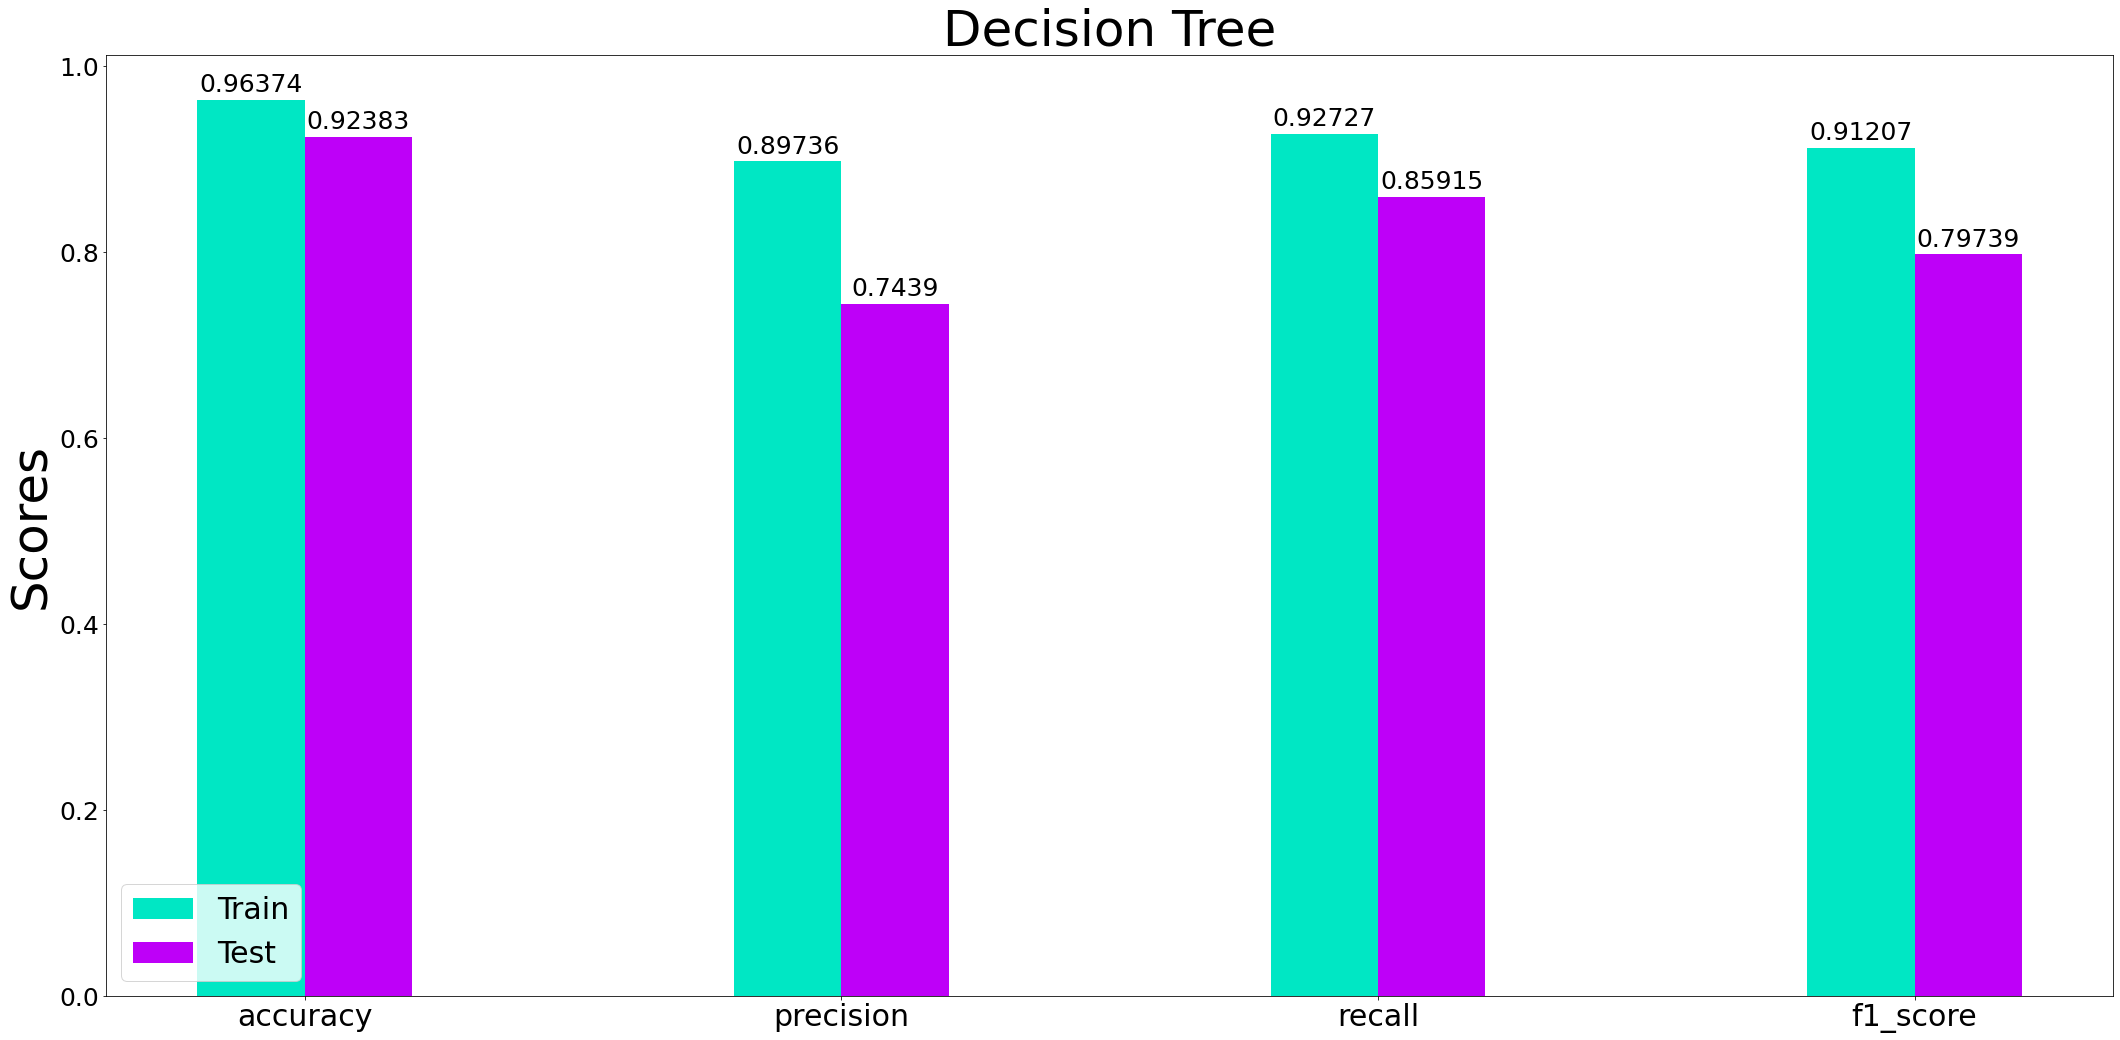

In [23]:
X_train, X_test, y_train, y_test=split_train_and_test(df_point,"Point Guard")

DT_clf = decision_tree(X_scale_train, y_train)

DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')


DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
show_plot(category,DT_train,DT_test,'Decision Tree','#00e7c4','#be00f8')

In [24]:
def show_plot2(machine,train,test,name,color1,color2):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(machine))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
    rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(name,fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(machine,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

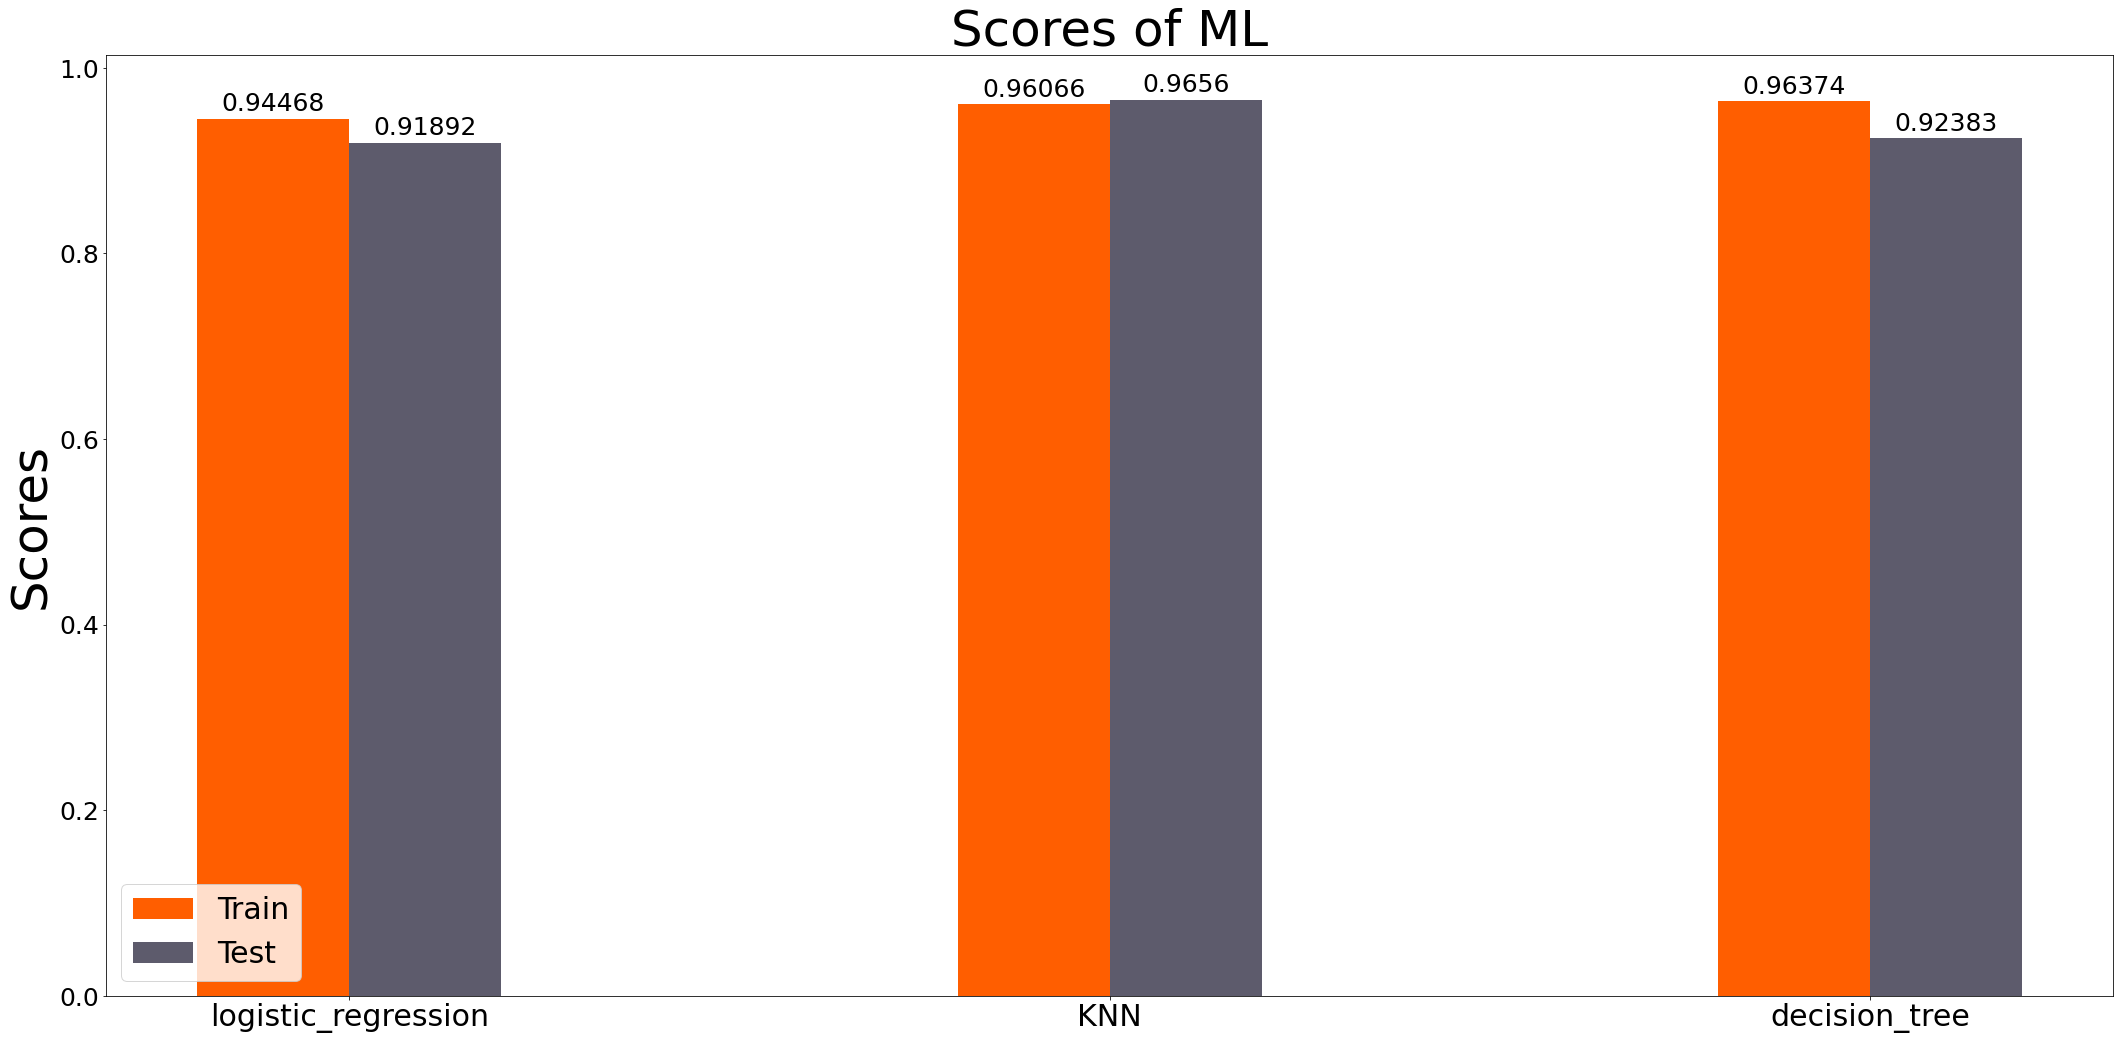

In [25]:
show_plot2(machine,train,test,'Scores of ML','#ff5e00','#5d5b6c')

<b>As we can see, for the Point Guard position - the KNN model is the best model</b>
<b>We thought that for every posiotin there might be a different model that will be better for him so we repeated the process</b>

<h3>Power Forward</h3>

<b>KNN</b>

Best K is: 15 

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,1219,66
Actual Positive,230,112


confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,311,23
Actual Positive,48,25


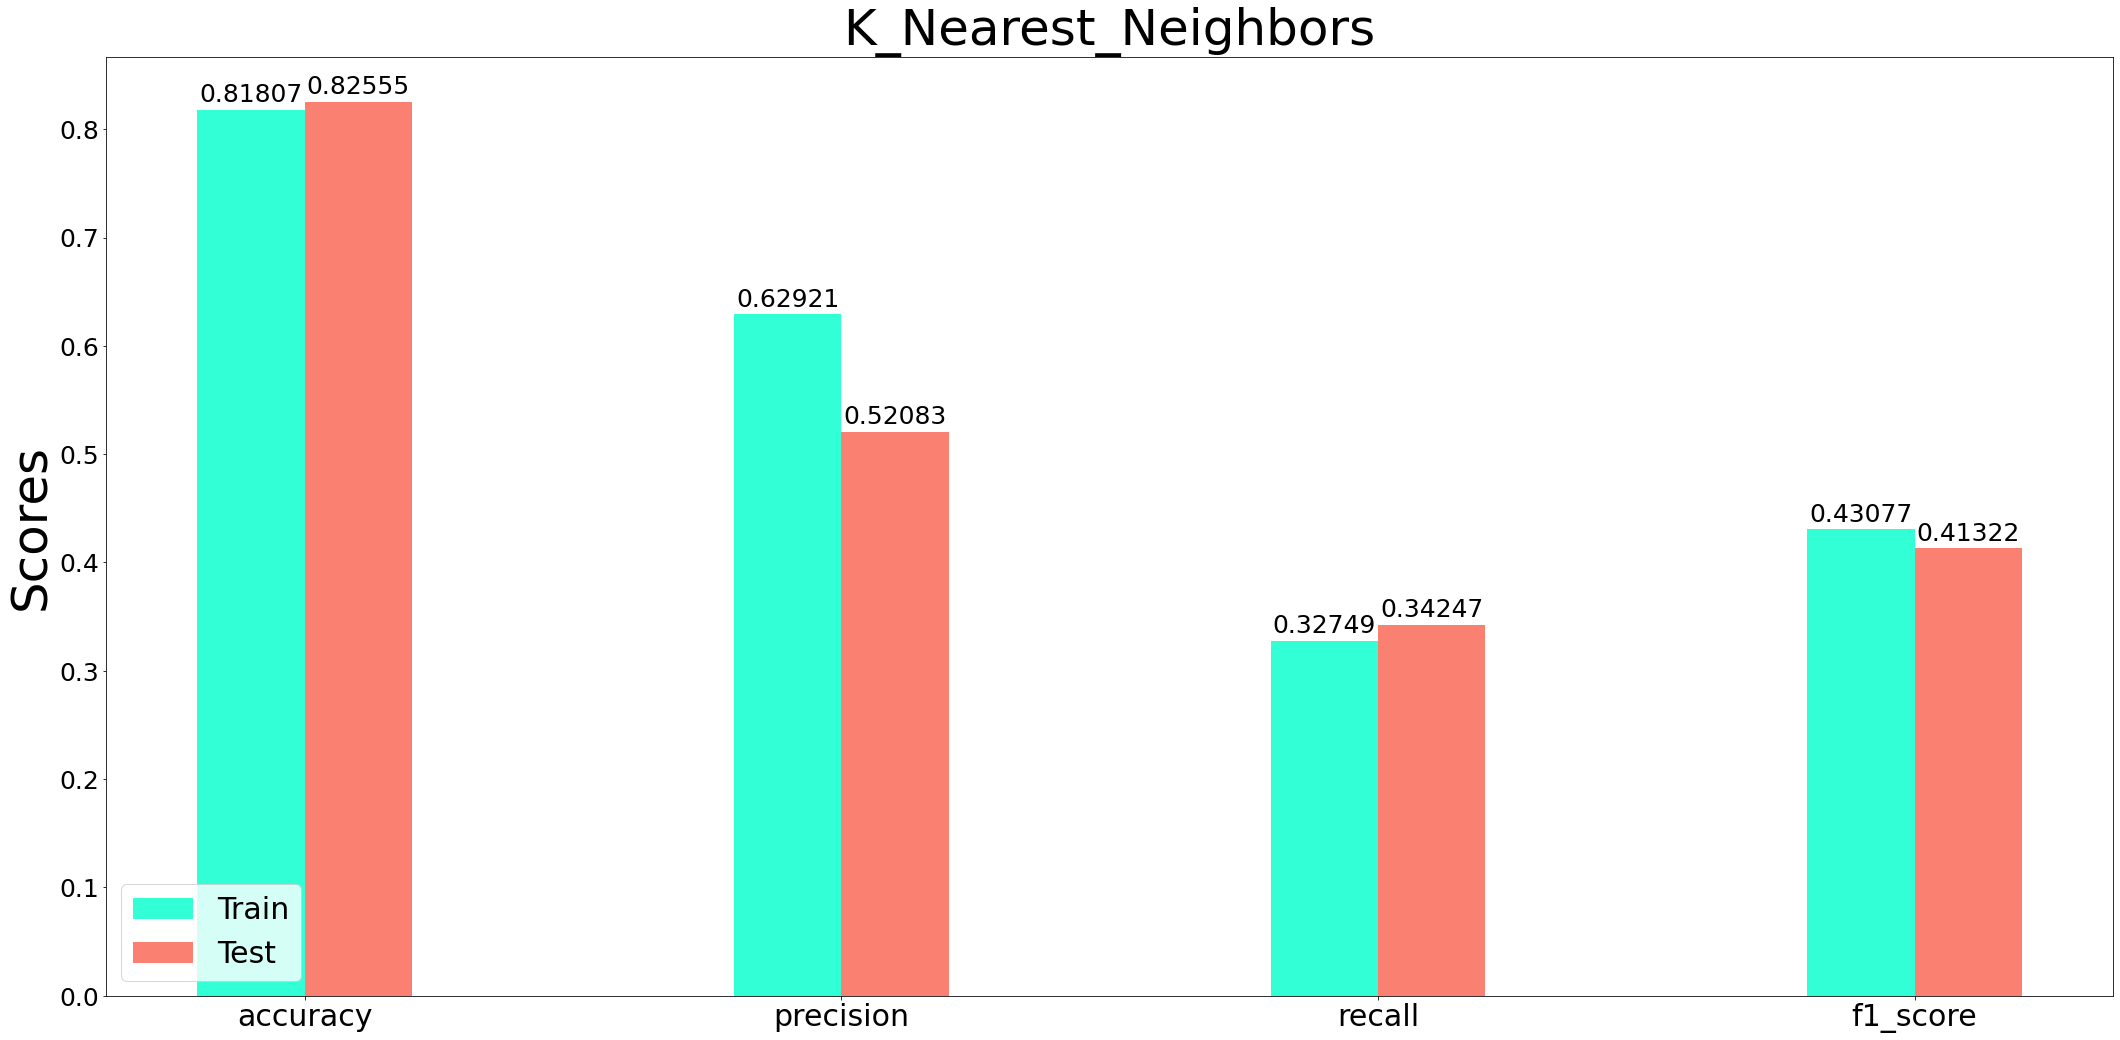

In [26]:
X_train, X_test, y_train, y_test=split_train_and_test(df_power,"Power Forward")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

knn_clf = KNN(X_scale_train, y_train)

knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train),5))
evo_met(y_train, knn_y_pred_train,'KNN train')

knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
show_plot(category,knn_train,knn_test,'K_Nearest_Neighbors','#33ffd6','salmon')

<b>Logistic Regression</b>

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,1188,97
Actual Positive,246,96


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,313,21
Actual Positive,55,18


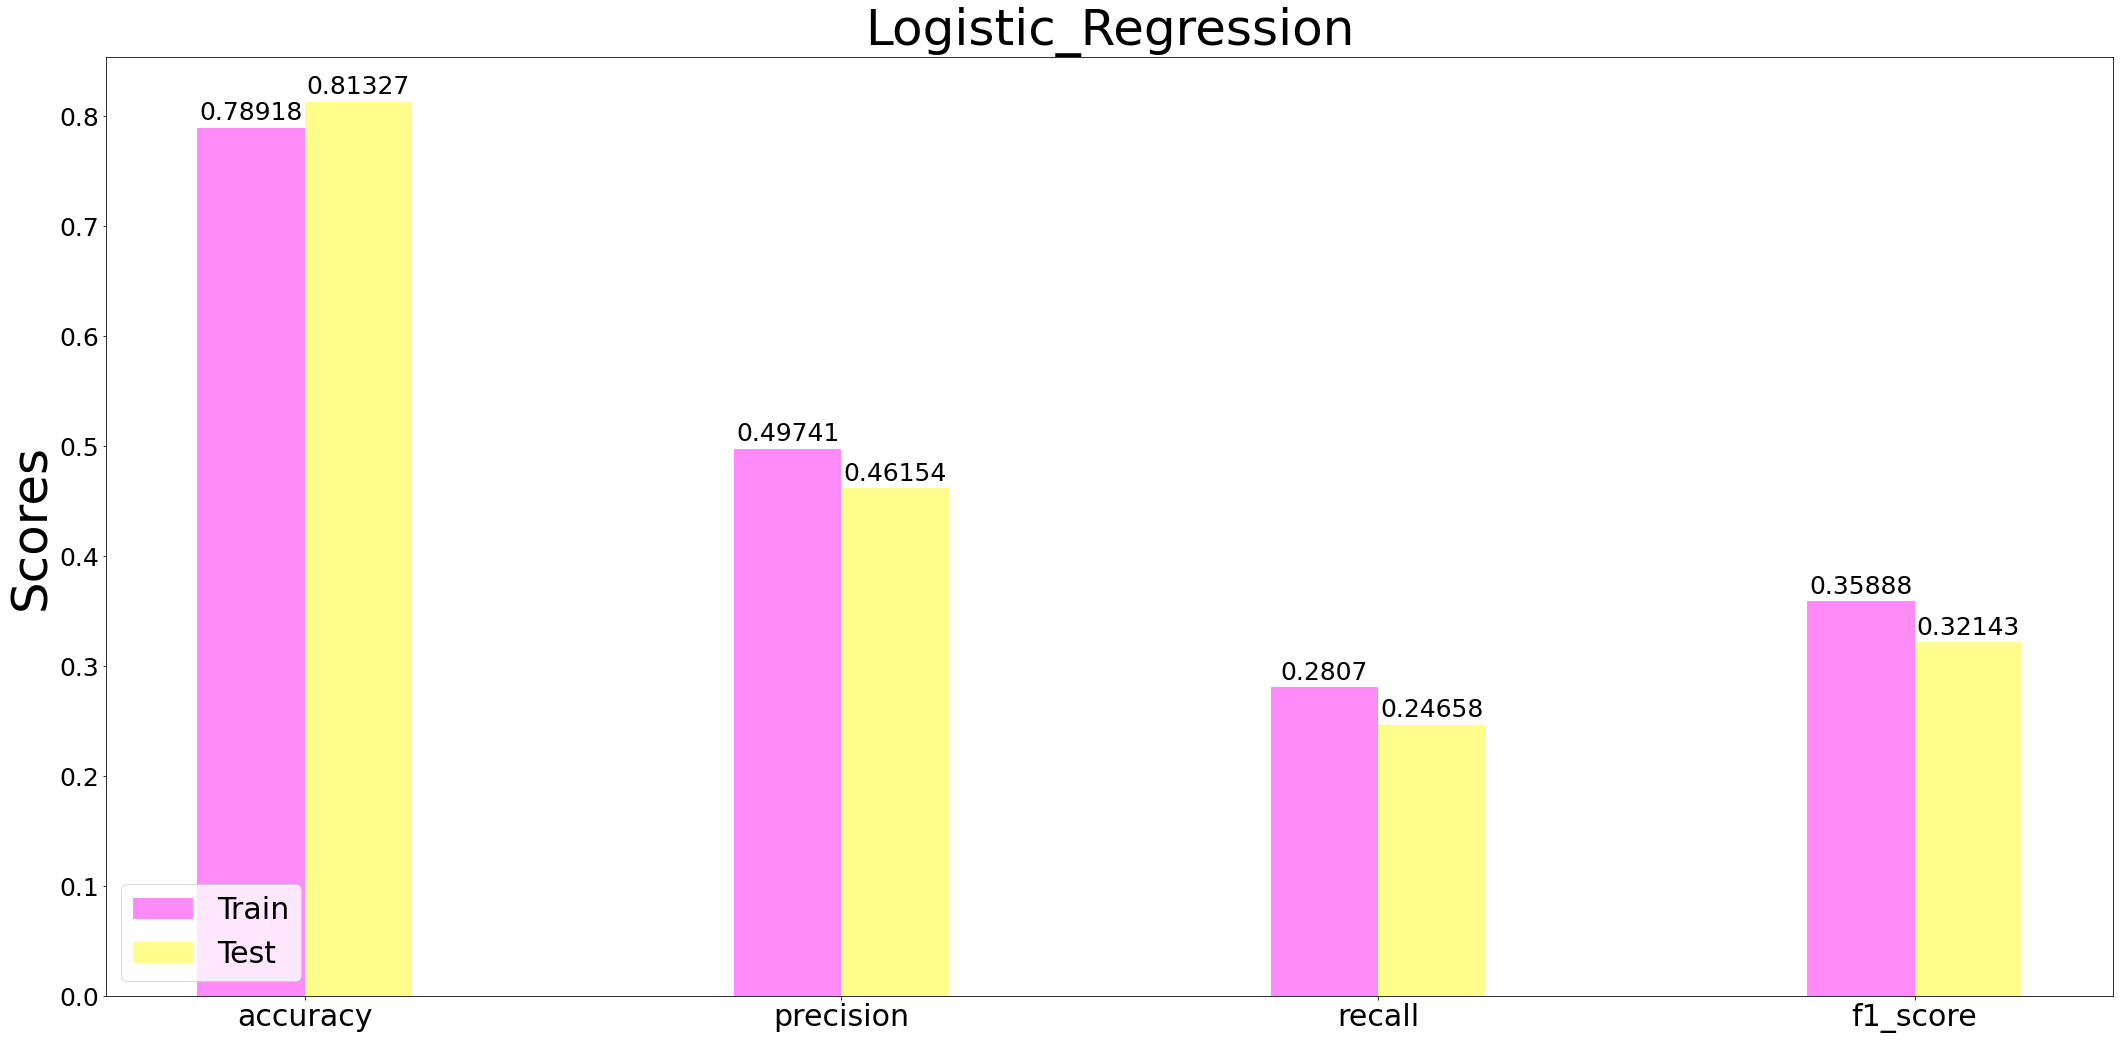

In [27]:
X_train, X_test, y_train, y_test=split_train_and_test(df_power,"Power Forward")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


LR_clf = logistic_regression(X_scale_train, y_train)

LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')


LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
show_plot(category,LR_train,LR_test,'Logistic_Regression','#ff8bf9','#fffd8b')


<b>Decision Tree</b>

Best max depth is: 10 

Best min samples split: 15 

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,1242,43
Actual Positive,56,286


confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,292,42
Actual Positive,29,44


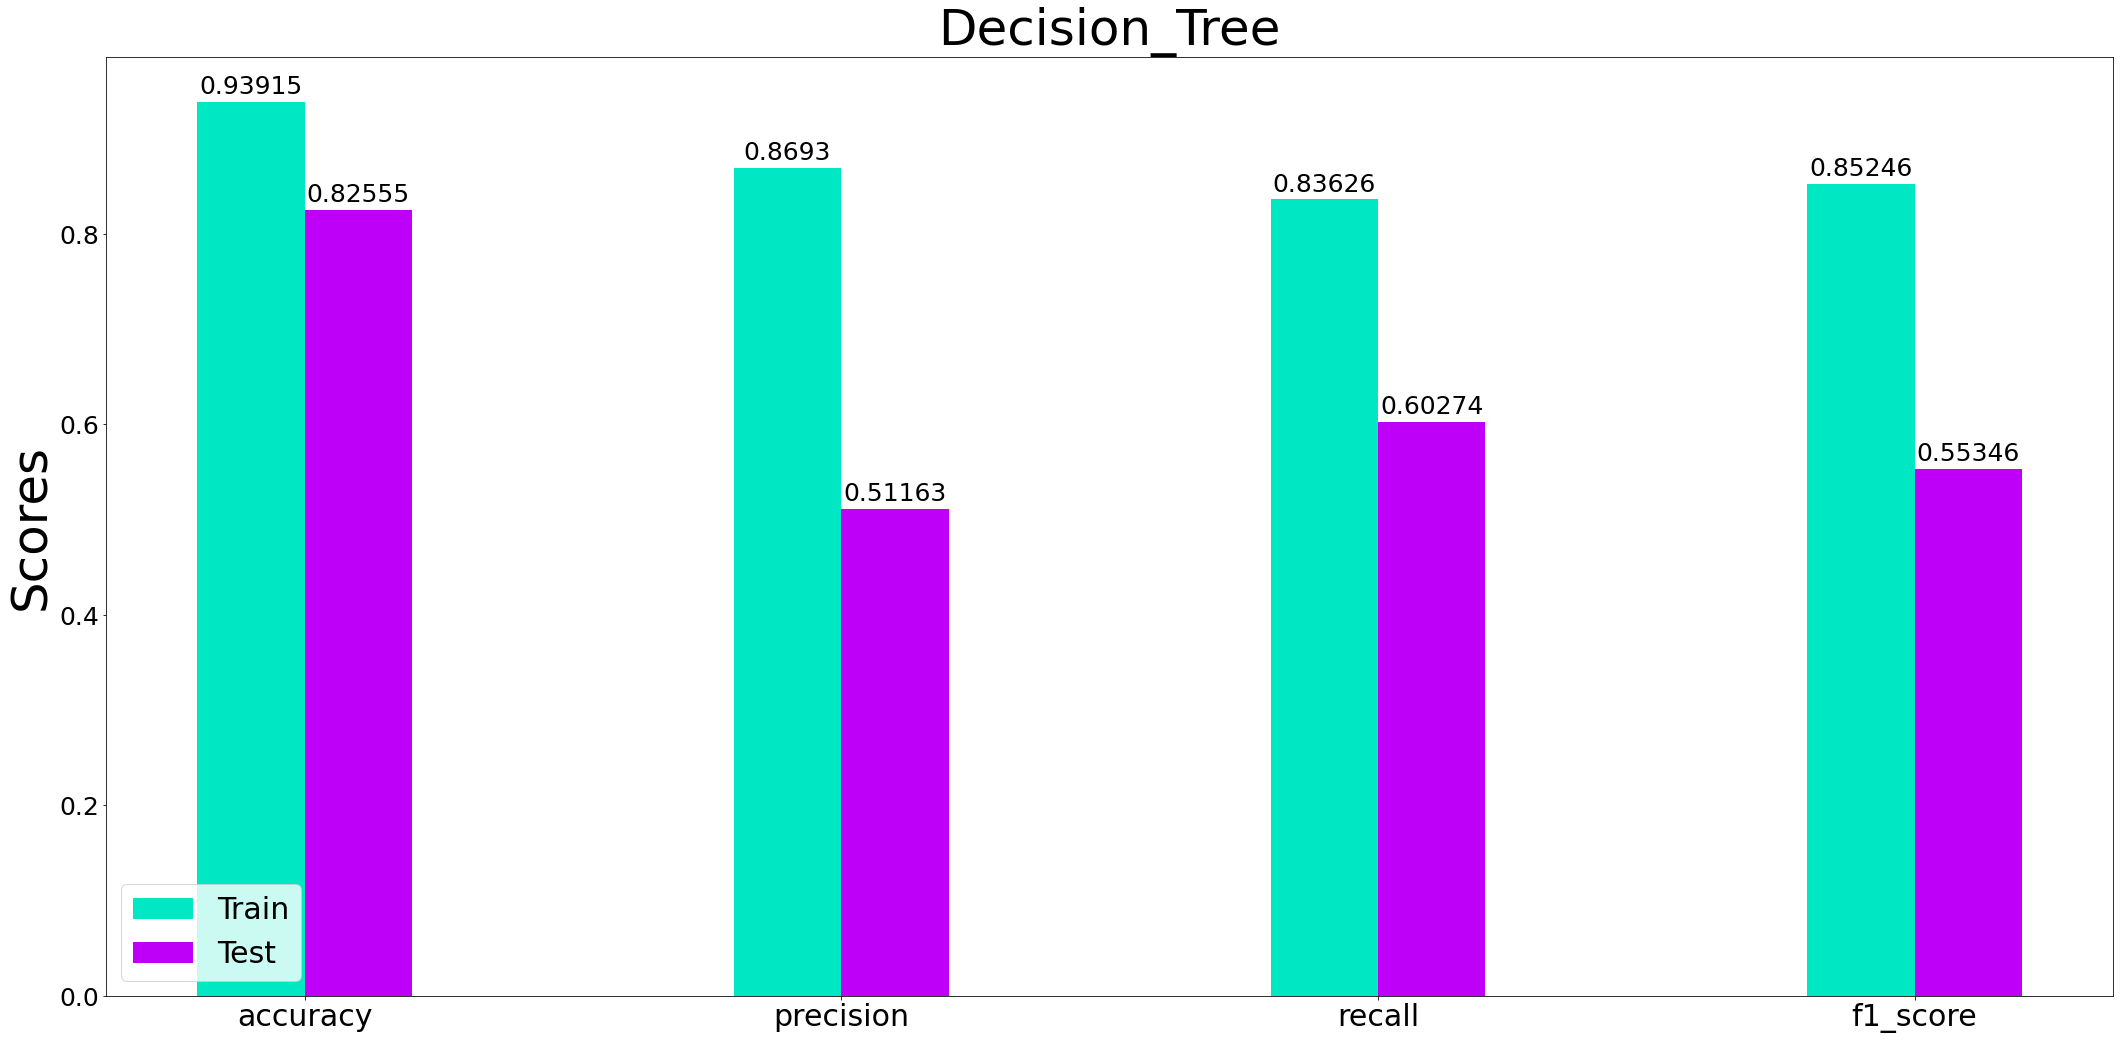

In [28]:
X_train, X_test, y_train, y_test=split_train_and_test(df_power,"Power Forward")

DT_clf = decision_tree(X_scale_train, y_train)

DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')


DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
show_plot(category,DT_train,DT_test,'Decision_Tree','#00e7c4','#be00f8')

<b>Models Comparison</b>

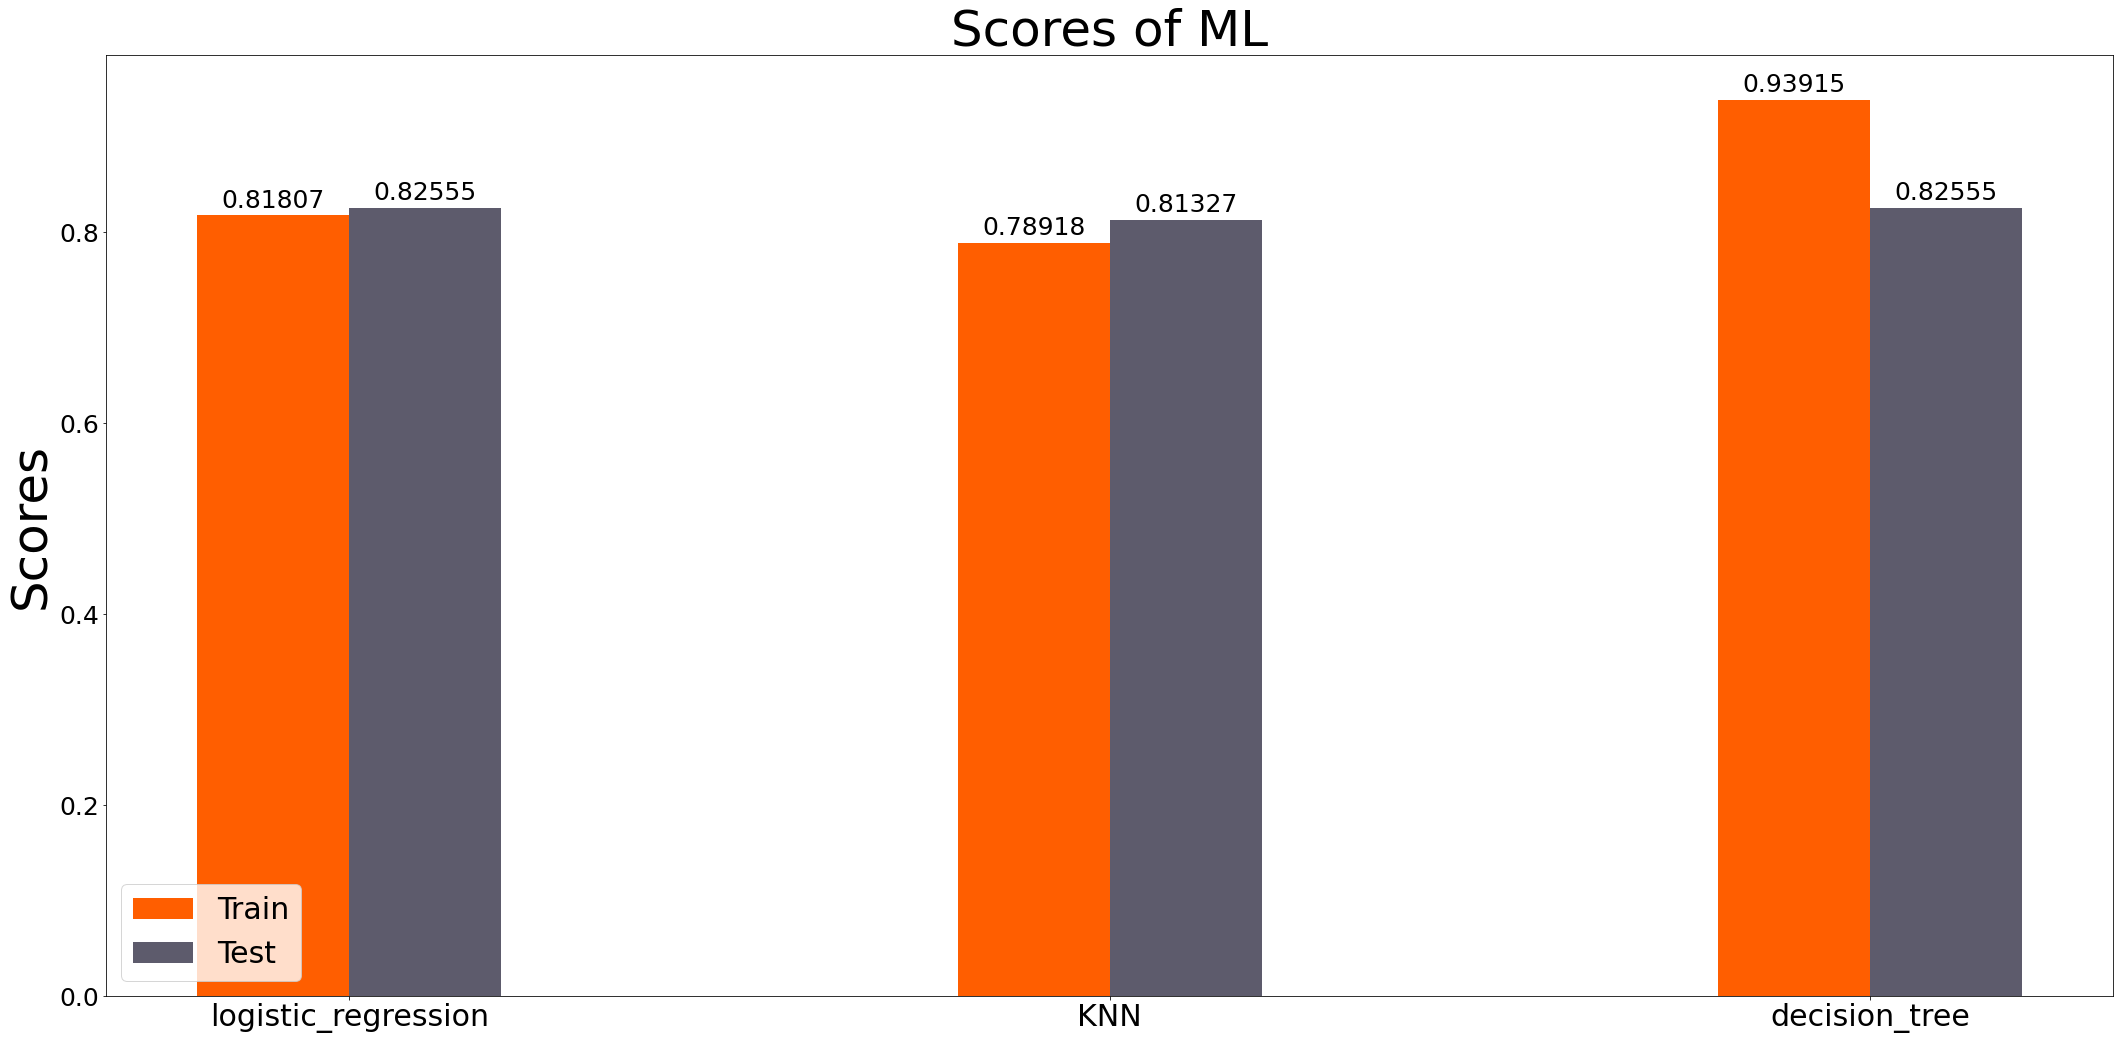

In [29]:
show_plot2(machine,train,test,'Scores of ML','#ff5e00','#5d5b6c')

<h3>Small Forward</h3>

<b>KNN</b>

Best K is: 11 

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,1242,62
Actual Positive,194,129


confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,294,20
Actual Positive,50,43


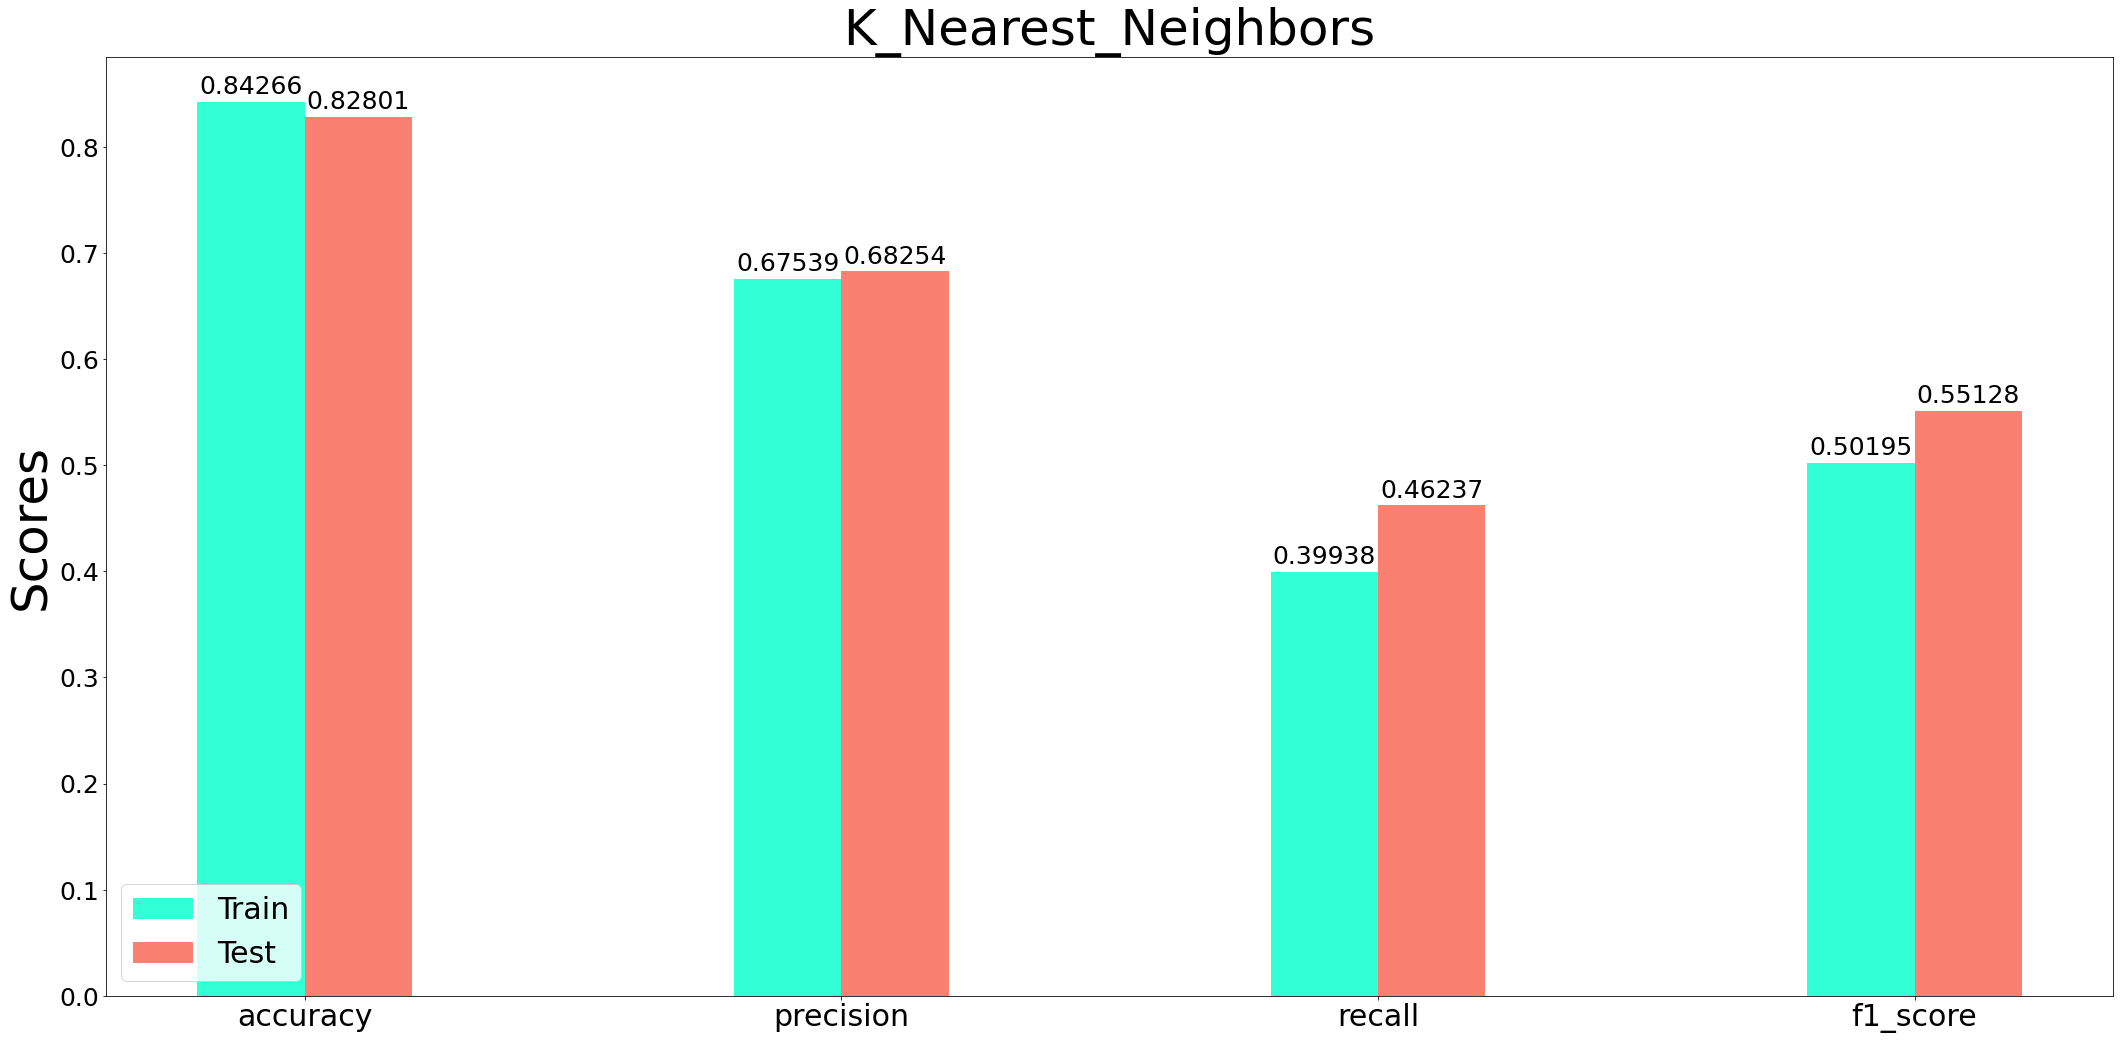

In [30]:
X_train, X_test, y_train, y_test=split_train_and_test(df_small,"Small Forward")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

knn_clf = KNN(X_scale_train, y_train)

knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train),5))
evo_met(y_train, knn_y_pred_train,'KNN train')

knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
show_plot(category,knn_train,knn_test,'K_Nearest_Neighbors','#33ffd6','salmon')

<b>Logistic Regression</b>

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,1258,46
Actual Positive,282,41


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,303,11
Actual Positive,79,14


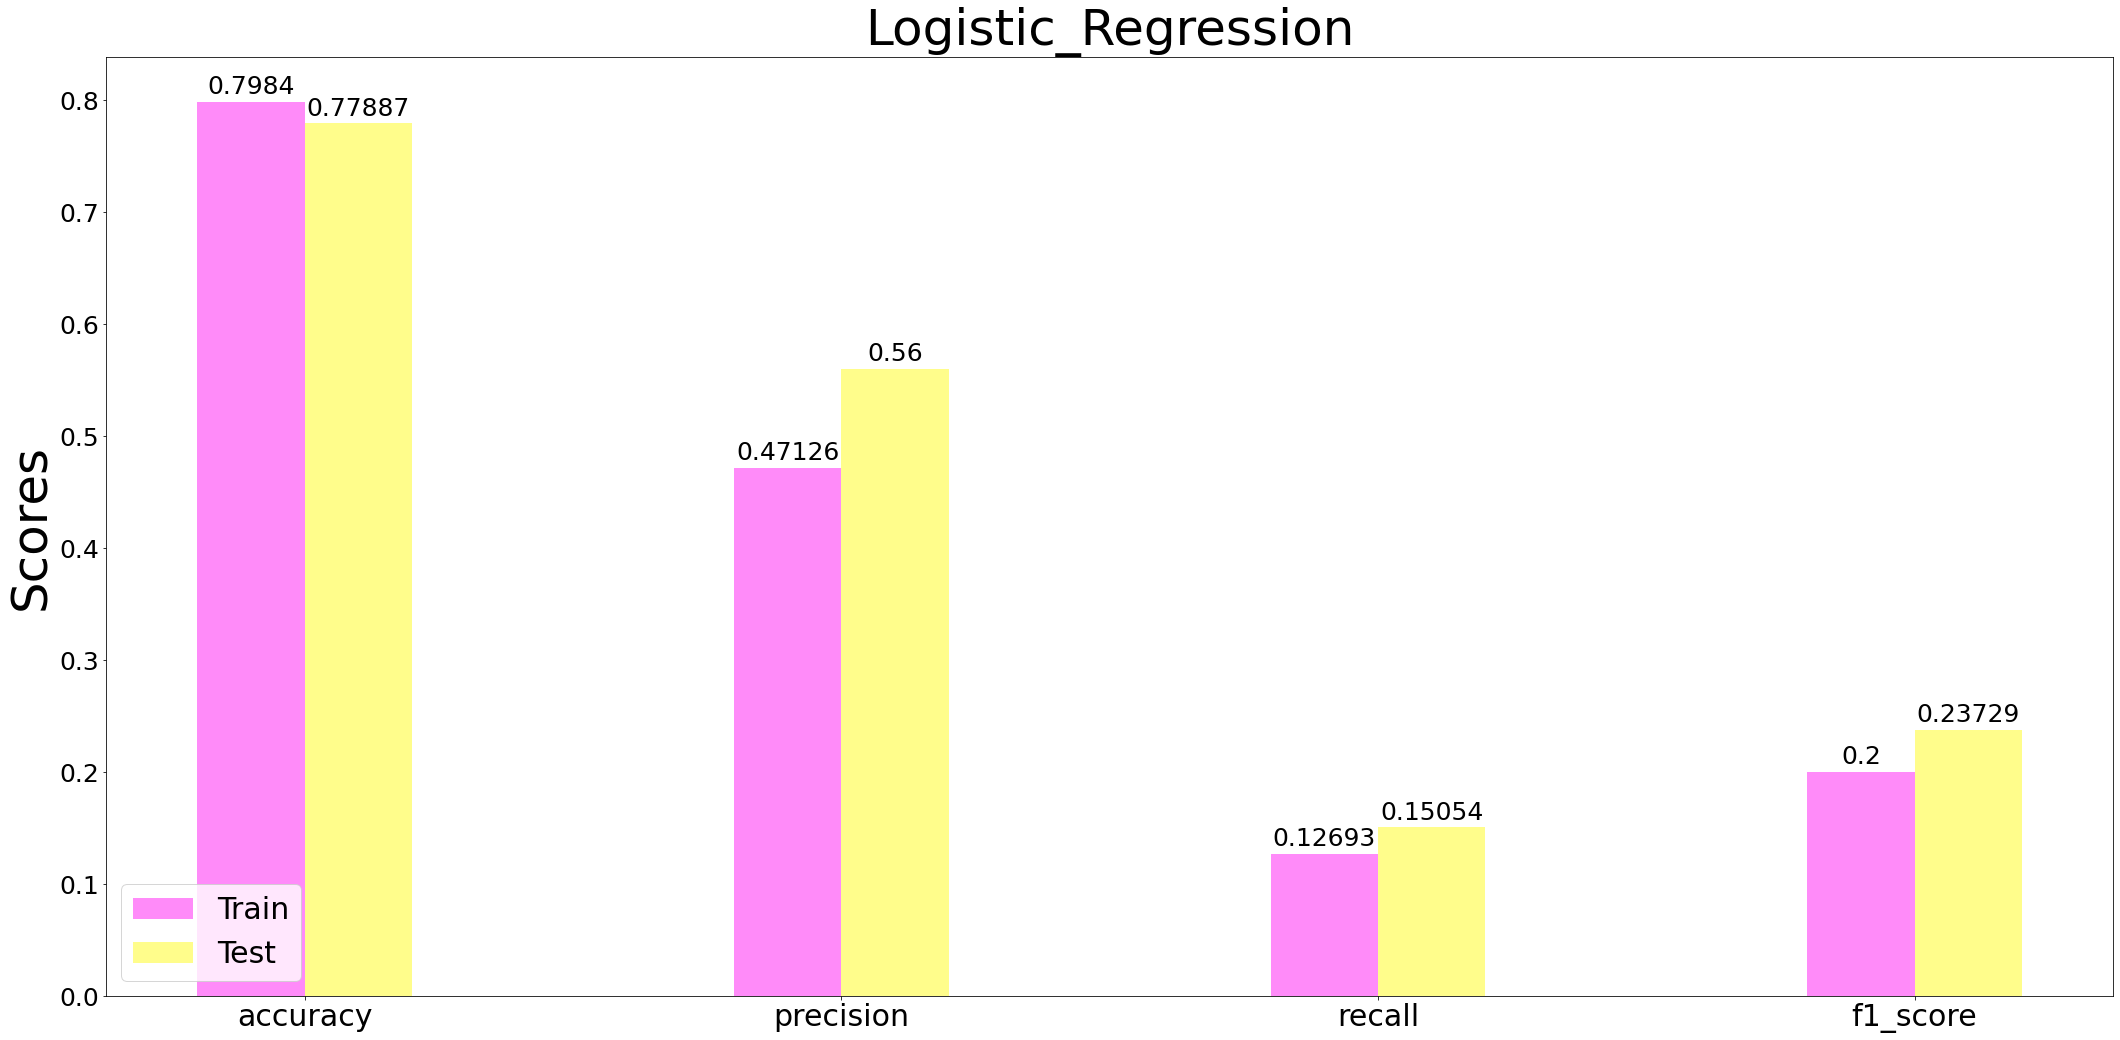

In [32]:
X_train, X_test, y_train, y_test=split_train_and_test(df_small,"Small Forward")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


LR_clf = logistic_regression(X_scale_train, y_train)

LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')


LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
show_plot(category,LR_train,LR_test,'Logistic_Regression','#ff8bf9','#fffd8b')


<b>Decision Tree</b>


Best max depth is: 10 

Best min samples split: 10 

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,1258,46
Actual Positive,35,288


confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,275,39
Actual Positive,29,64


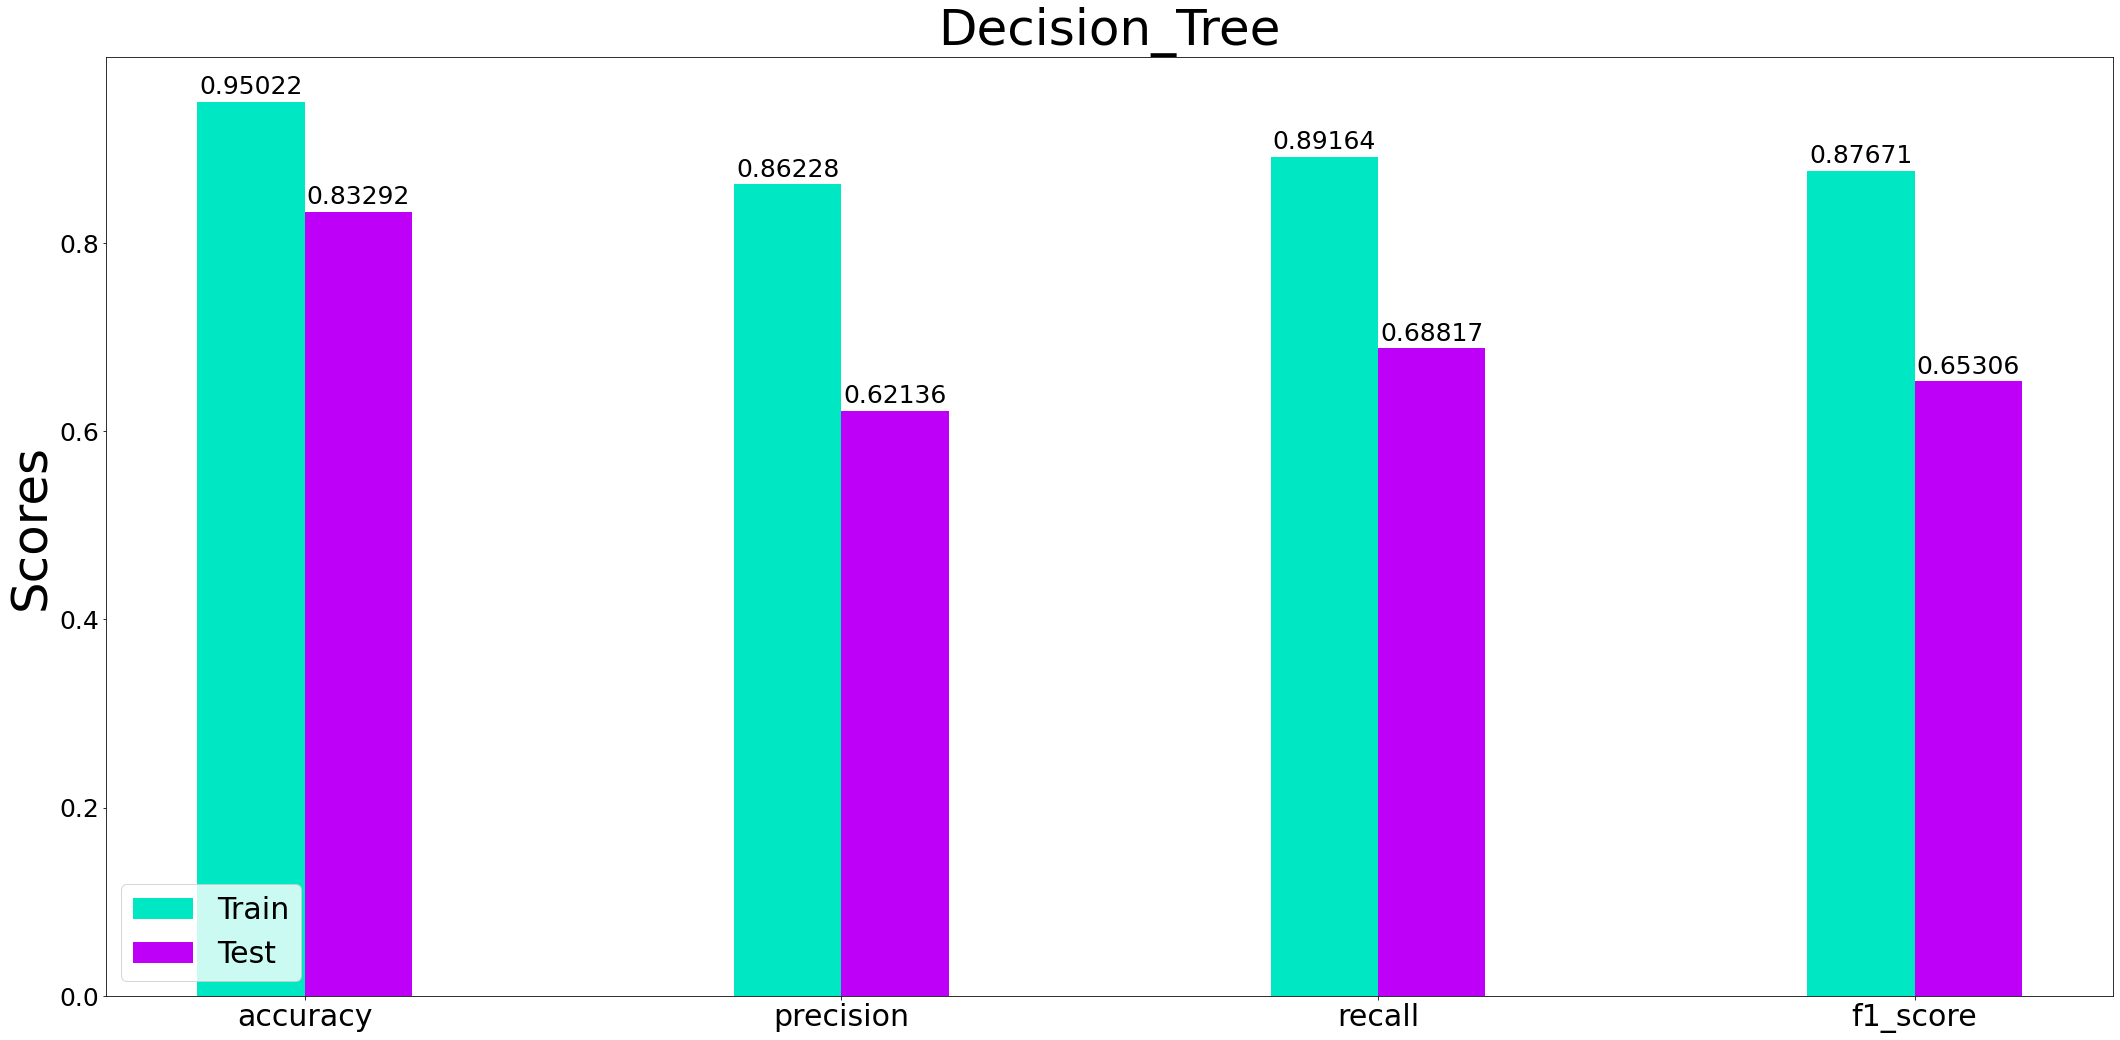

In [33]:
X_train, X_test, y_train, y_test=split_train_and_test(df_small,"Small Forward")

DT_clf = decision_tree(X_scale_train, y_train)

DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')


DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
show_plot(category,DT_train,DT_test,'Decision_Tree','#00e7c4','#be00f8')

<b>Models Comparison</b>


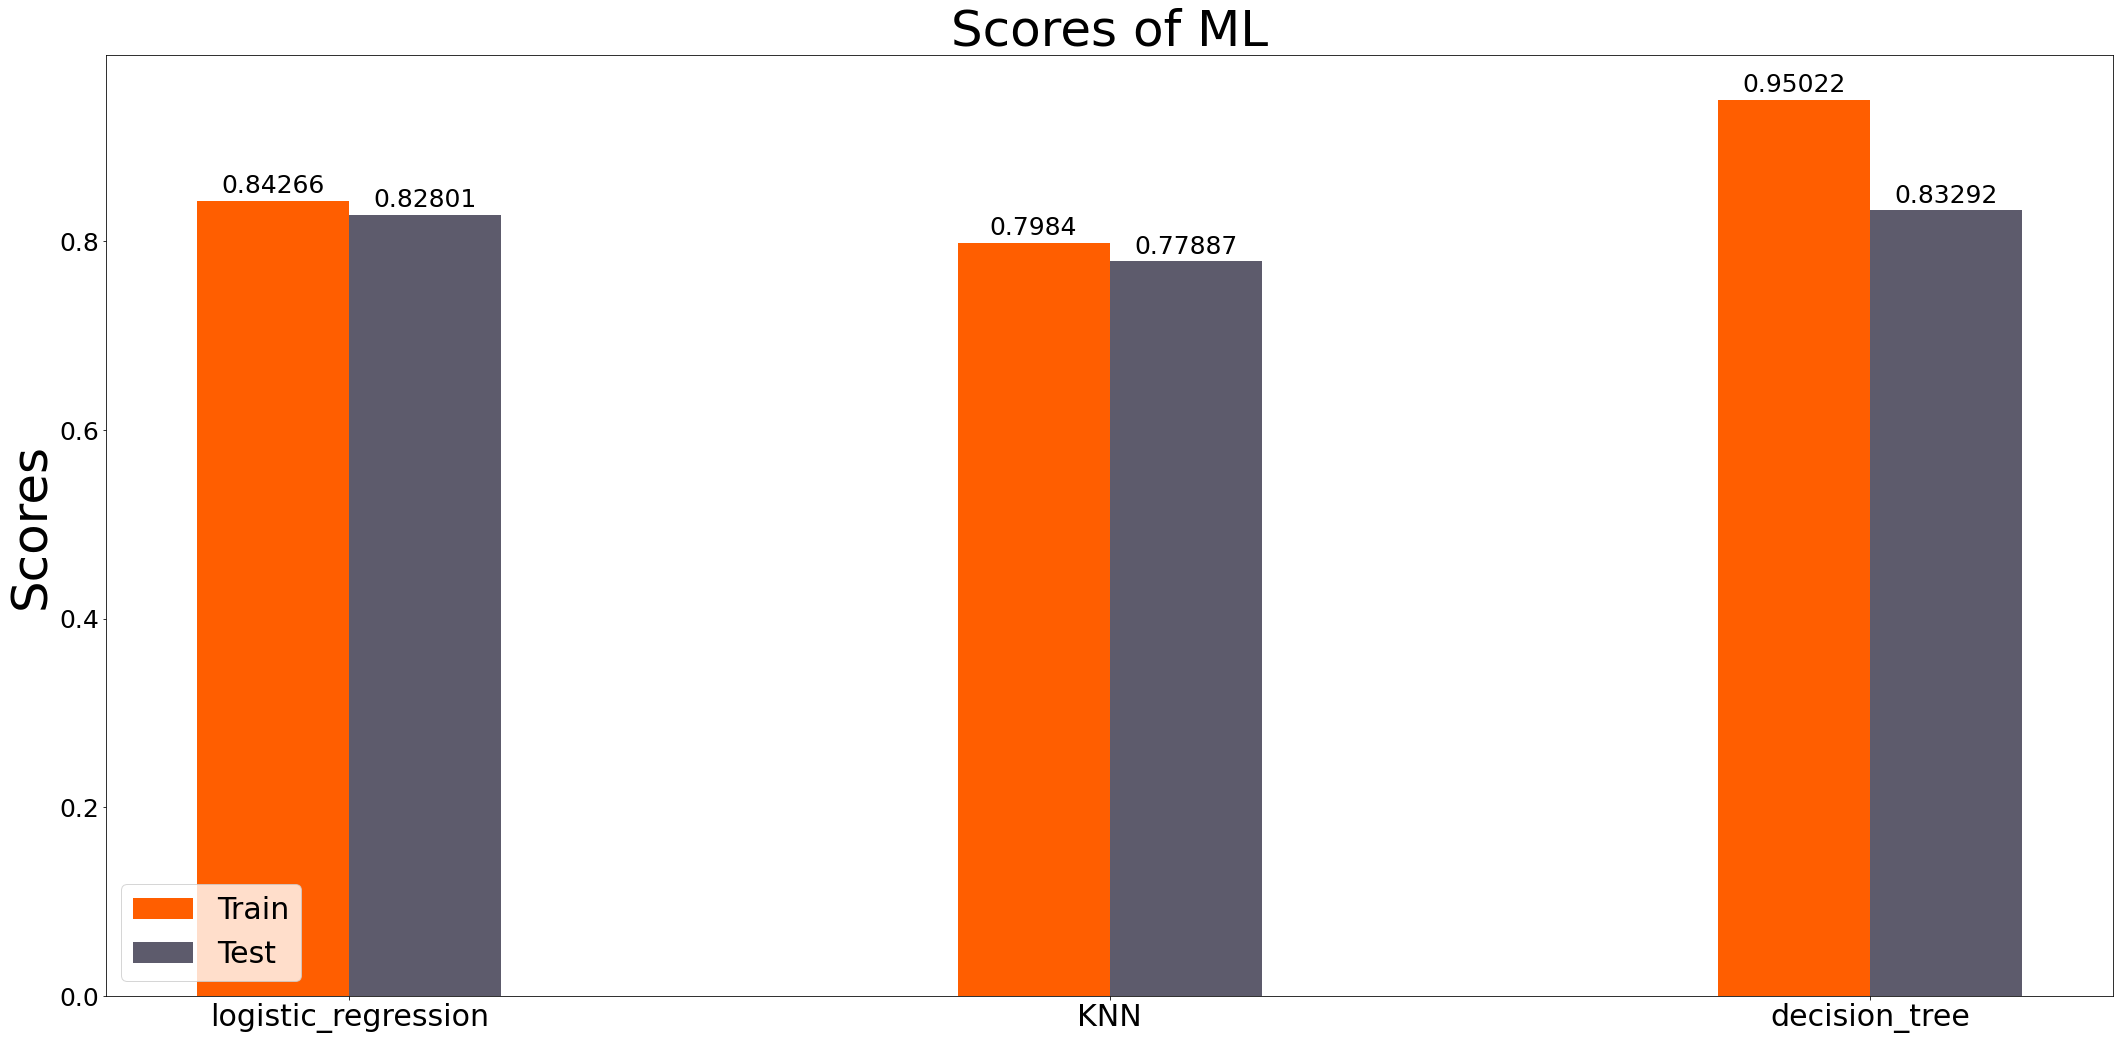

In [34]:
show_plot2(machine,train,test,'Scores of ML','#ff5e00','#5d5b6c')

<h3>Center</h3>


<b>KNN</b>


Best K is: 9 

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,1342,32
Actual Positive,129,124


confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,343,4
Actual Positive,40,20


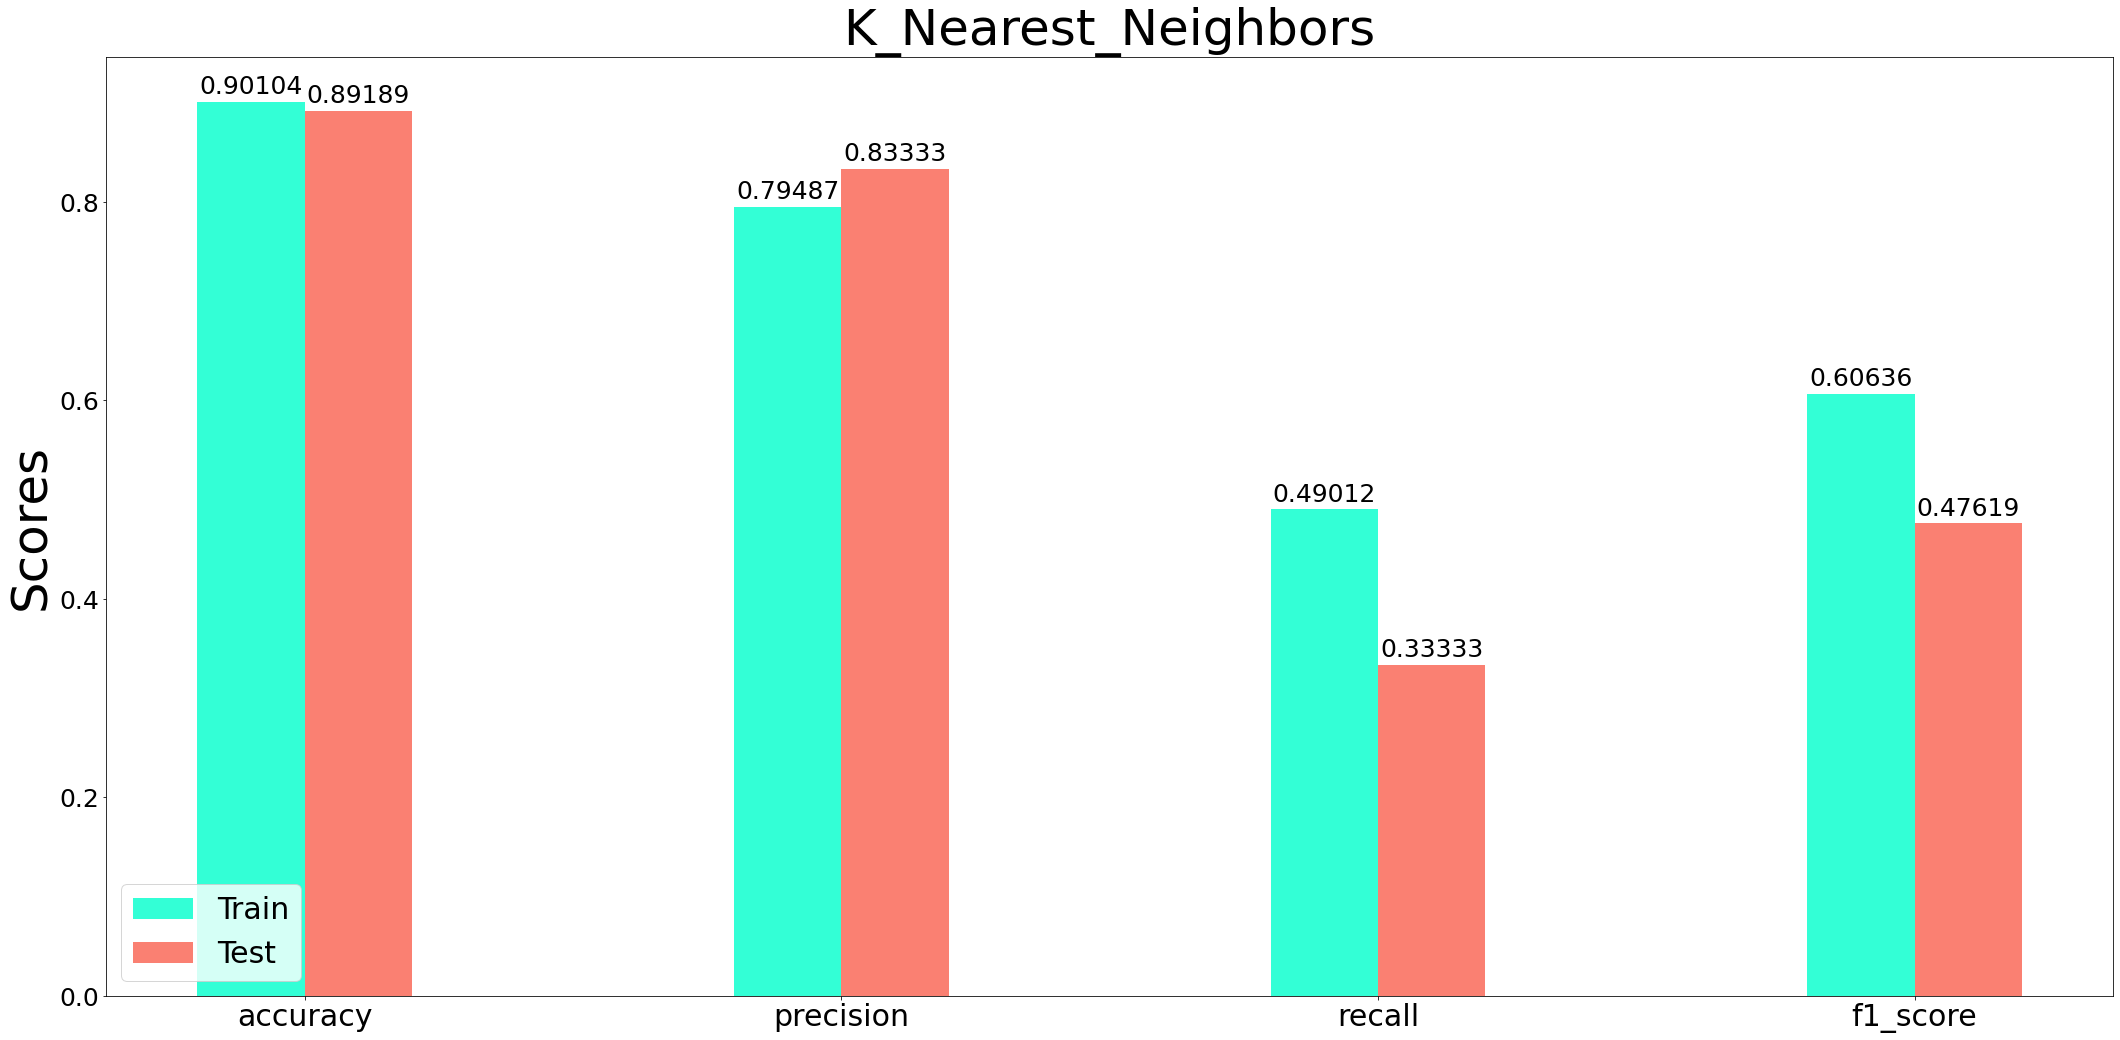

In [35]:
X_train, X_test, y_train, y_test=split_train_and_test(df_center,"Center")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

knn_clf = KNN(X_scale_train, y_train)

knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train),5))
evo_met(y_train, knn_y_pred_train,'KNN train')

knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
show_plot(category,knn_train,knn_test,'K_Nearest_Neighbors','#33ffd6','salmon')

<b>Logistic Regression</b>


confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,1308,66
Actual Positive,108,145


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,334,13
Actual Positive,27,33


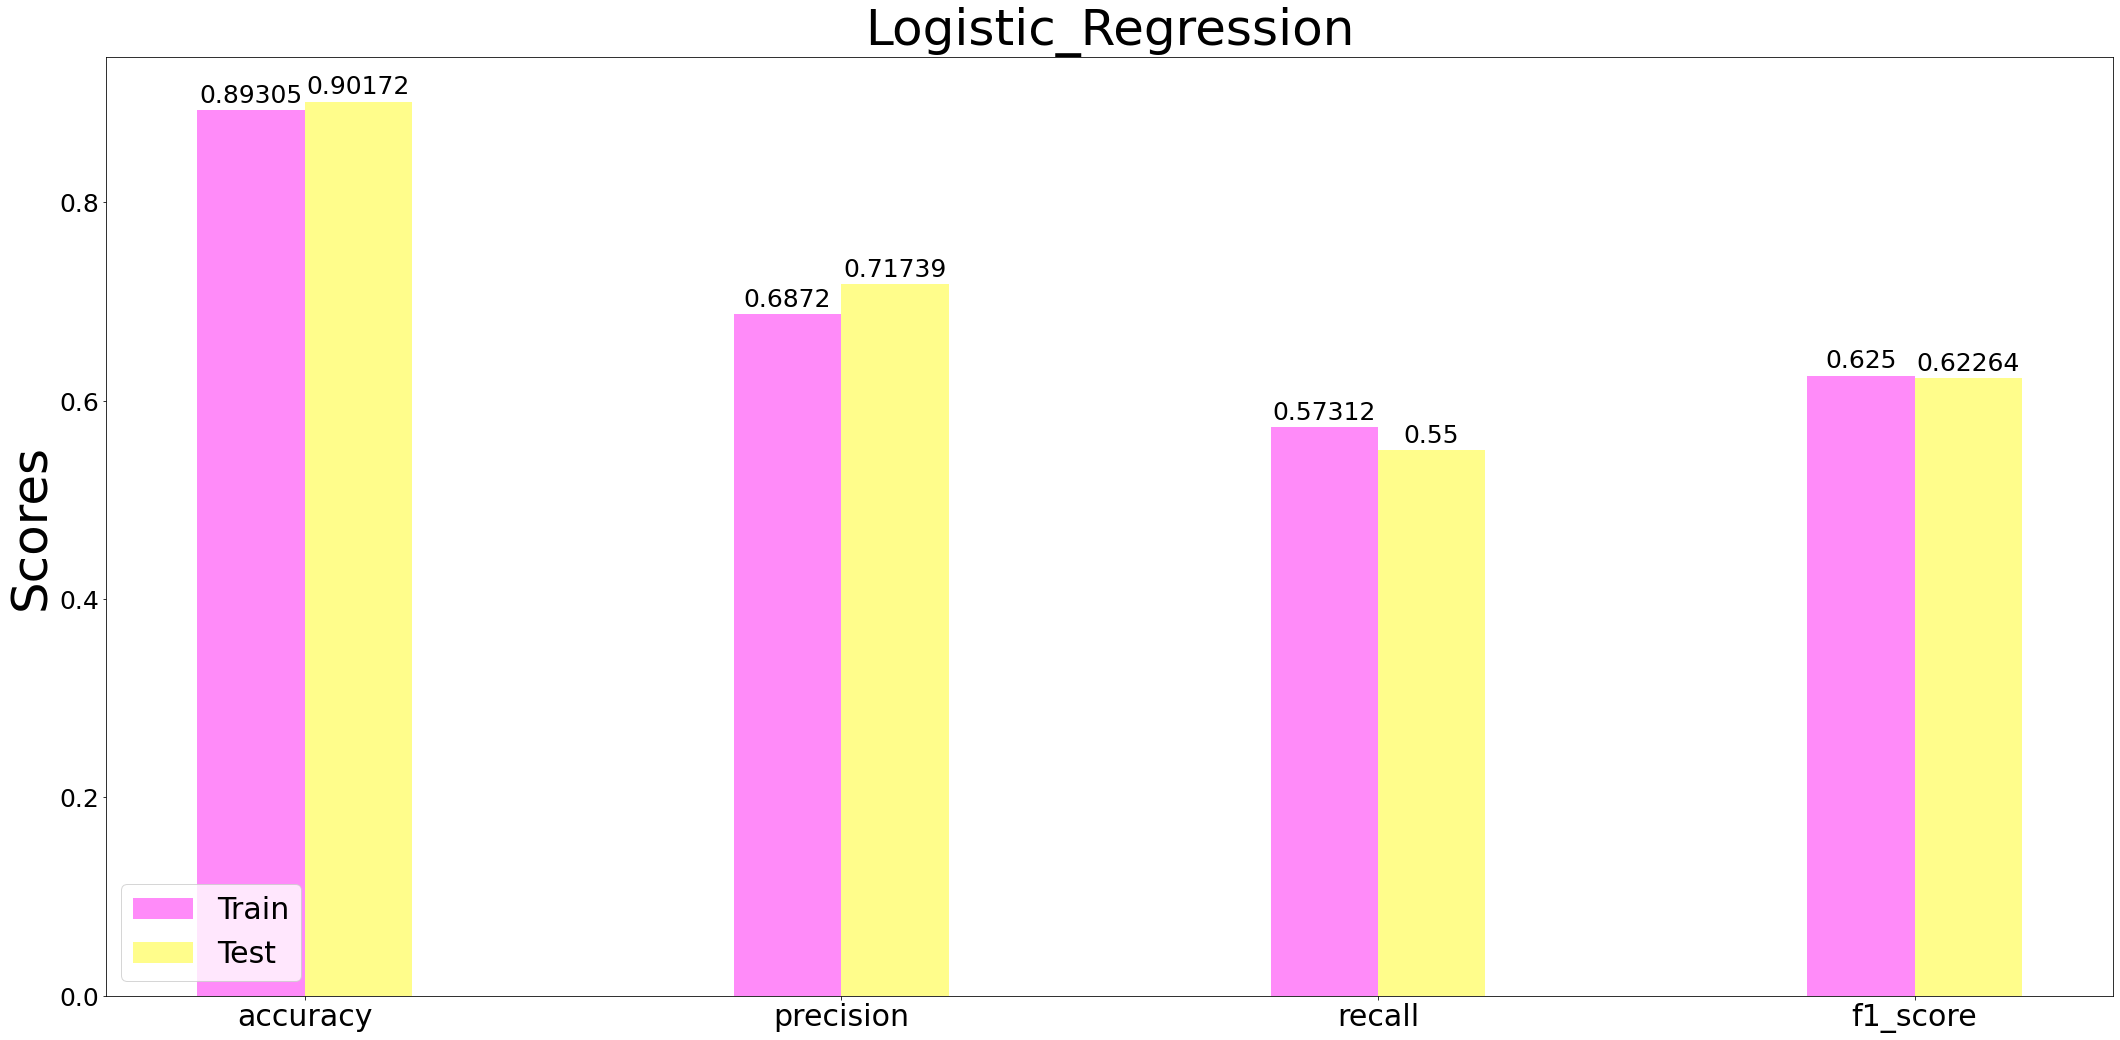

In [36]:
X_train, X_test, y_train, y_test=split_train_and_test(df_center,"Center")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


LR_clf = logistic_regression(X_scale_train, y_train)

LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')


LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
show_plot(category,LR_train,LR_test,'Logistic_Regression','#ff8bf9','#fffd8b')


<b>Decision Tree</b>


Best max depth is: 6 

Best min samples split: 10 

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,1341,33
Actual Positive,39,214


confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,332,15
Actual Positive,19,41


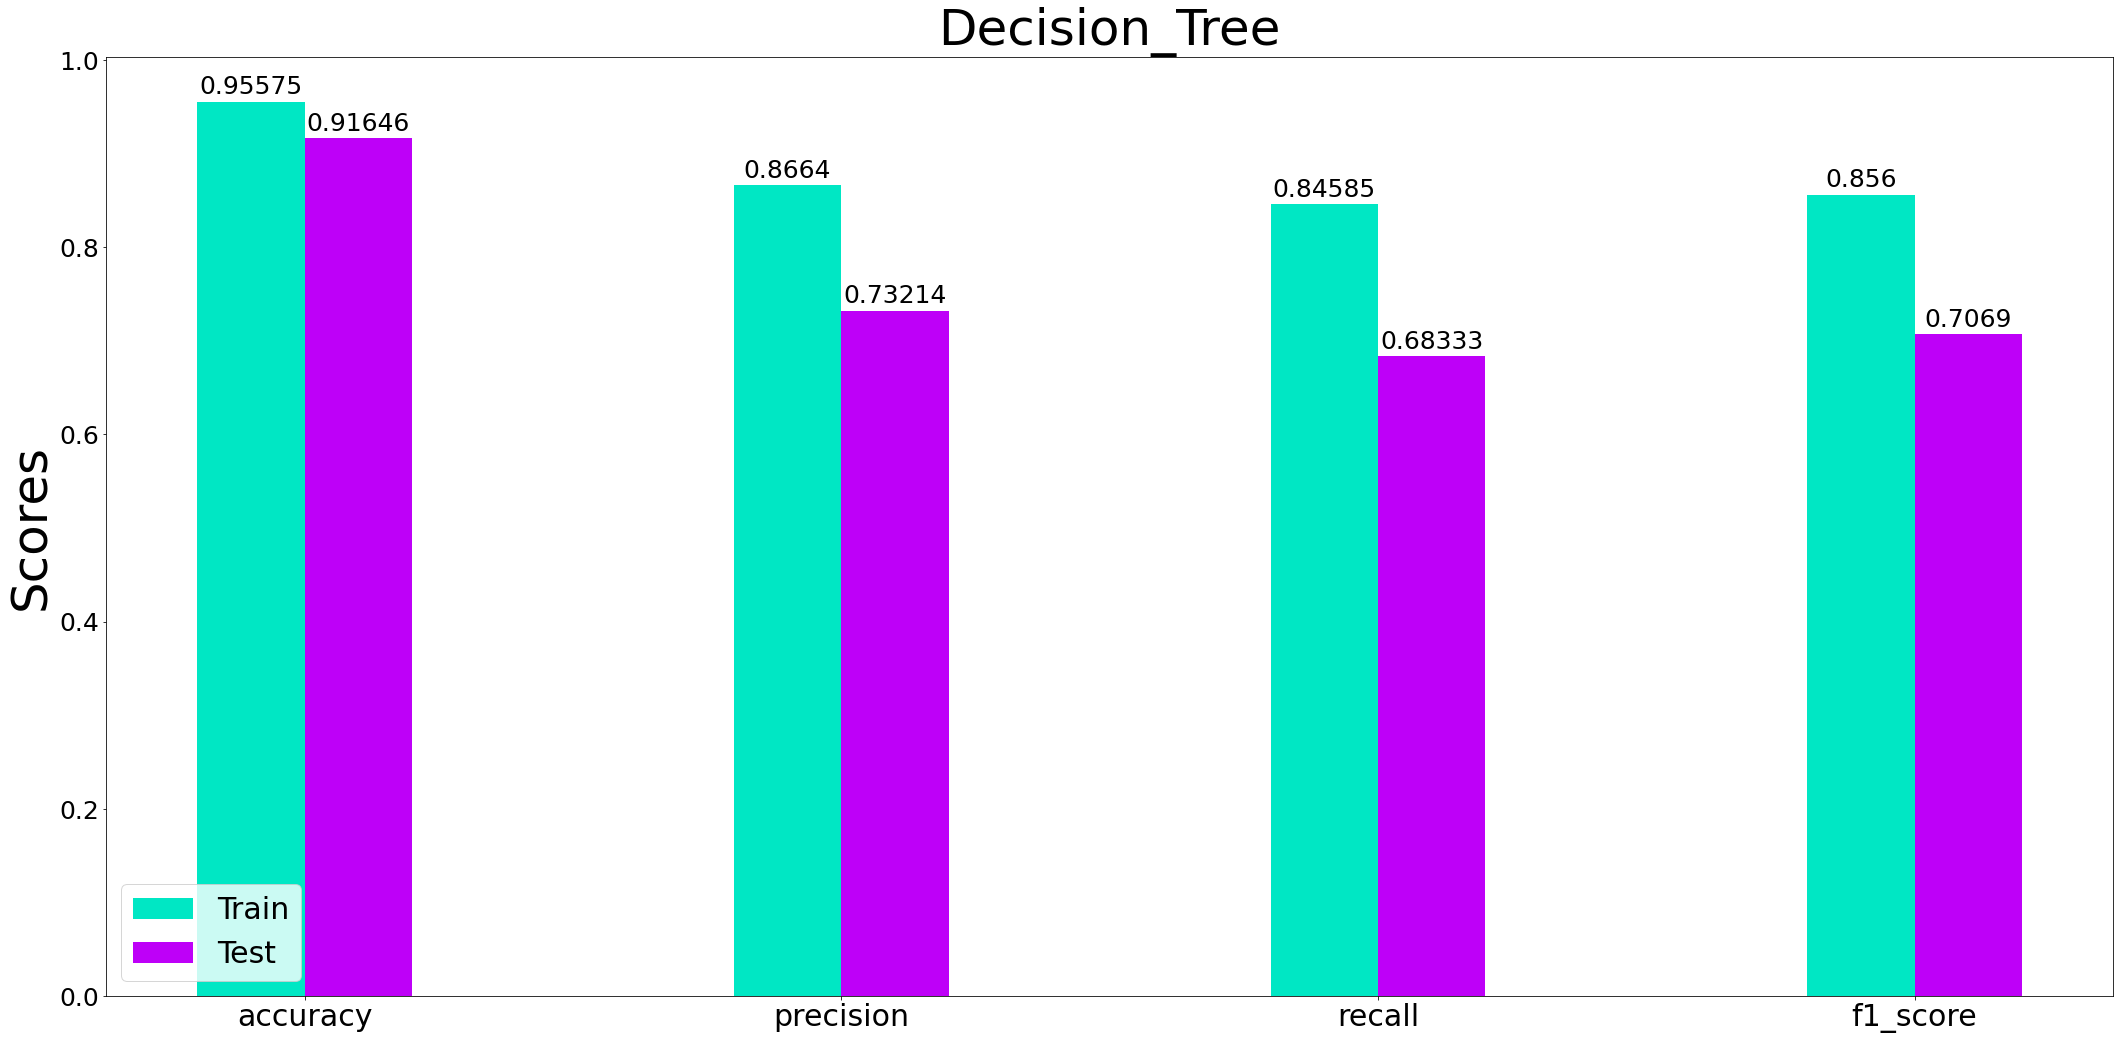

In [37]:
X_train, X_test, y_train, y_test=split_train_and_test(df_center,"Center")

DT_clf = decision_tree(X_scale_train, y_train)

DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')


DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
show_plot(category,DT_train,DT_test,'Decision_Tree','#00e7c4','#be00f8')

<b>Models Comparison</b>


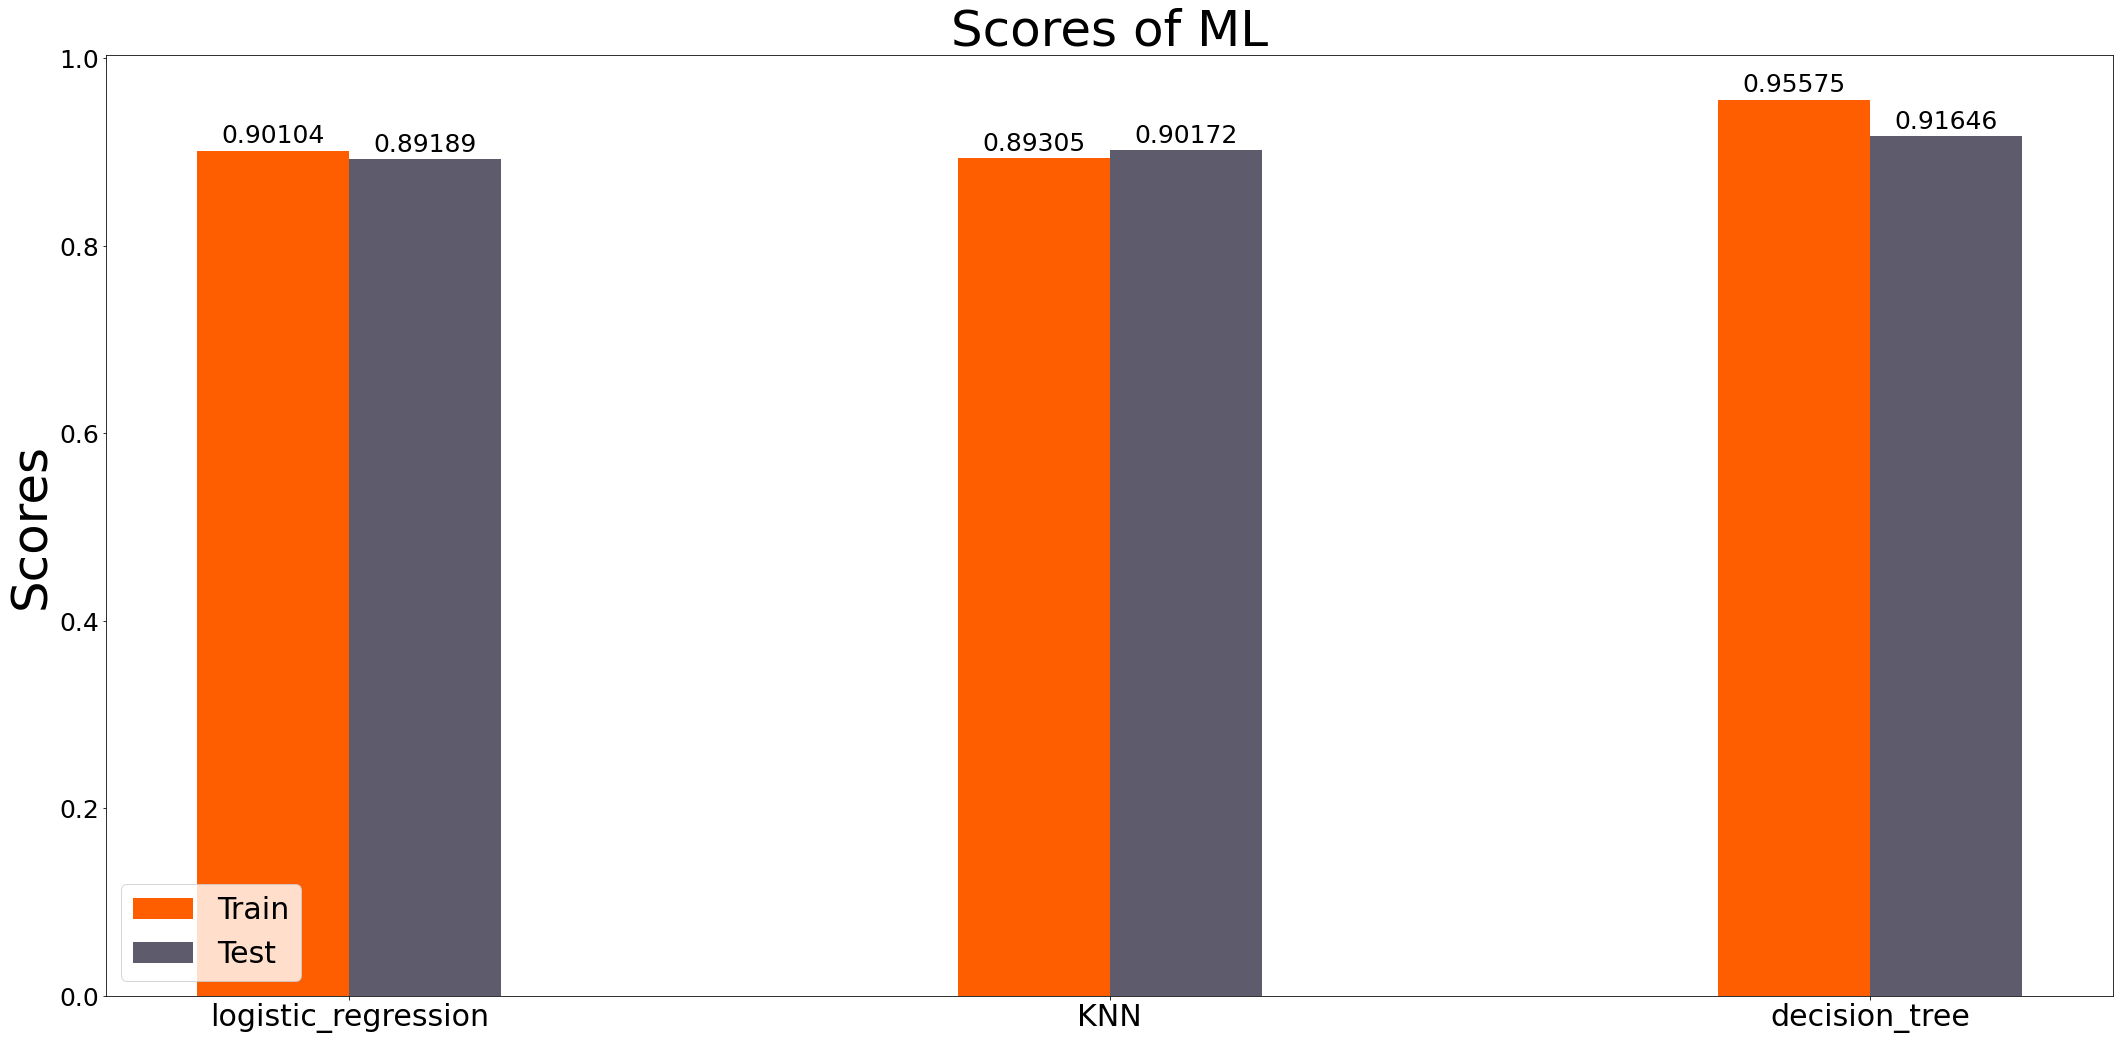

In [38]:
show_plot2(machine,train,test,'Scores of ML','#ff5e00','#5d5b6c')

<h3>Shooting Guard</h3>


<b>KNN</b>


Best K is: 17 

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,1168,80
Actual Positive,194,185


confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,277,20
Actual Positive,63,47


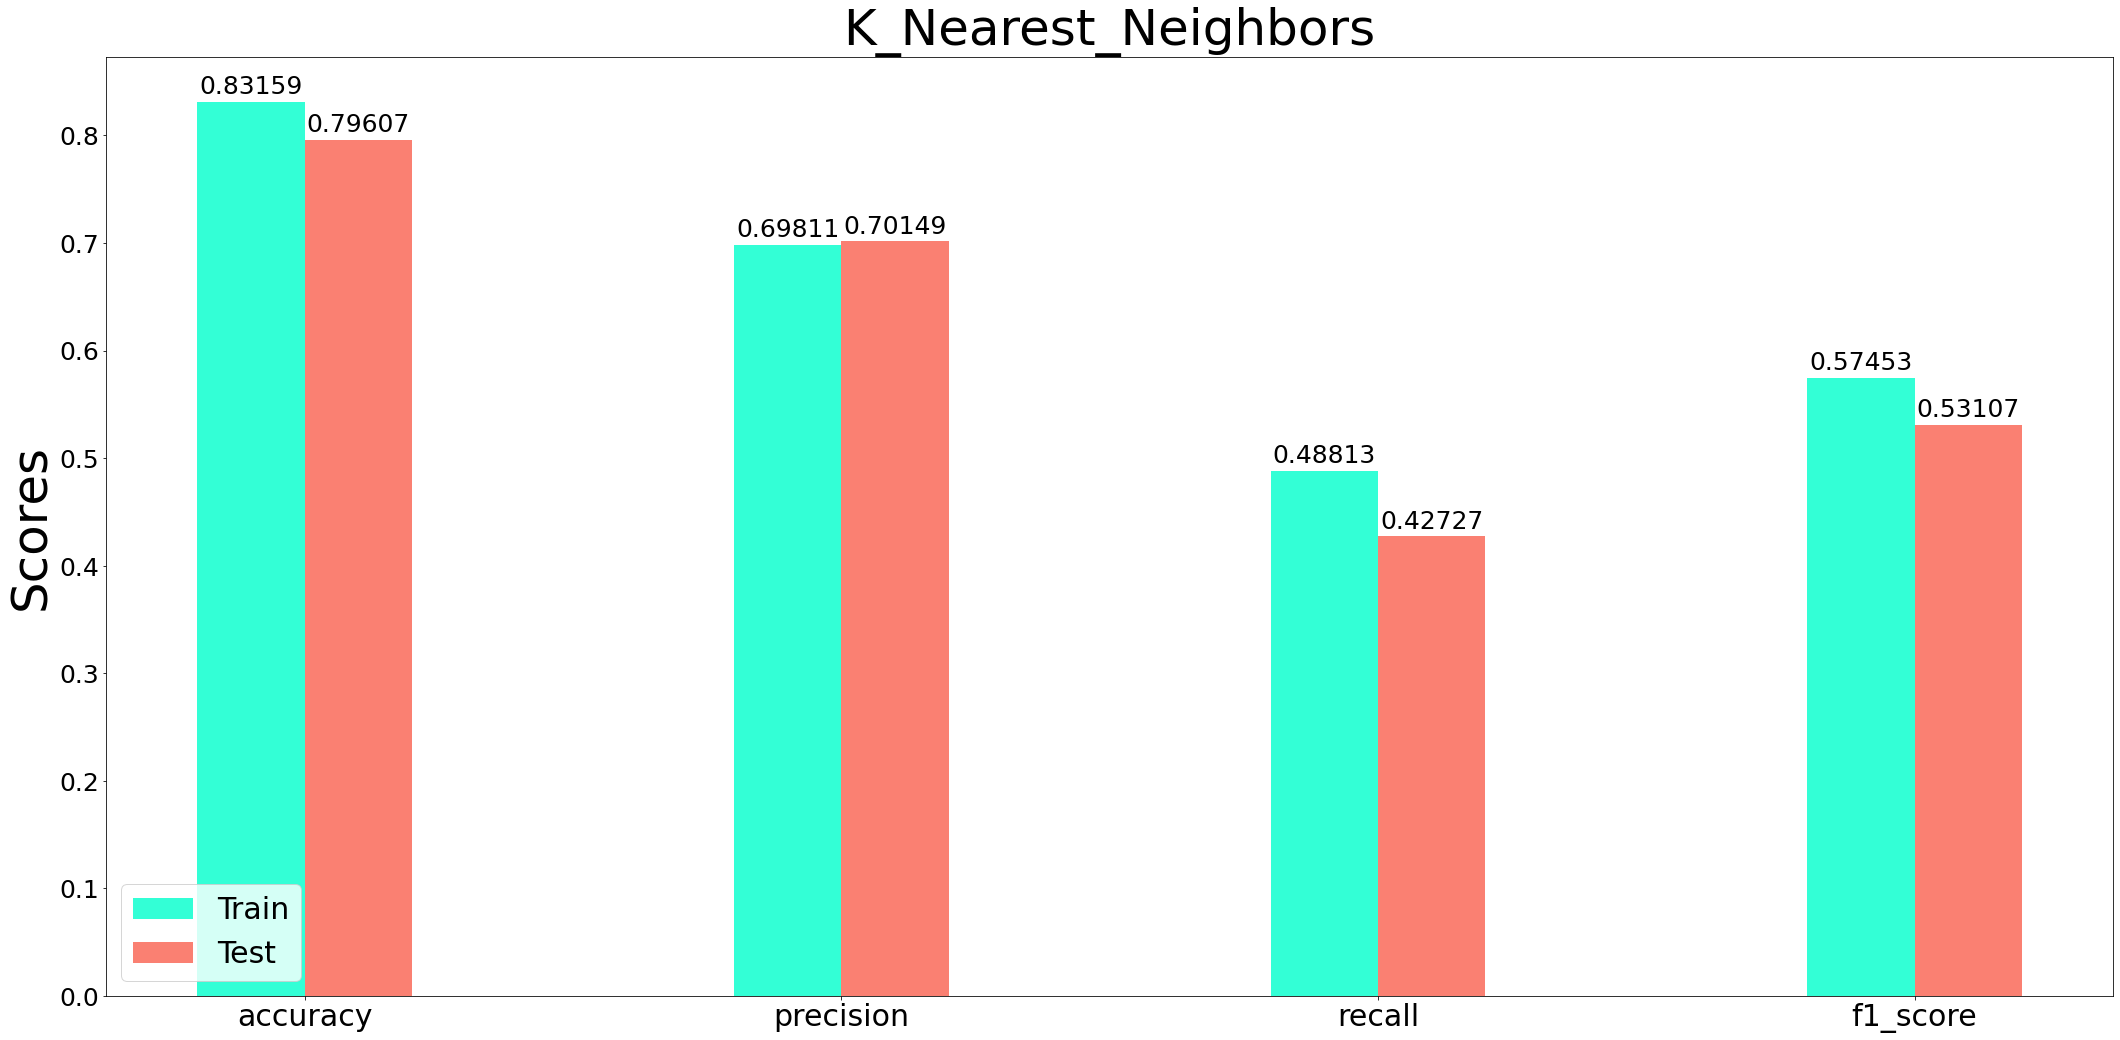

In [39]:

X_train, X_test, y_train, y_test=split_train_and_test(df_shooting,"Shooting Guard")
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []

knn_clf = KNN(X_scale_train, y_train)

knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train),5))
evo_met(y_train, knn_y_pred_train,'KNN train')

knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
show_plot(category,knn_train,knn_test,'K_Nearest_Neighbors','#33ffd6','salmon')

<b>Logistic Regression</b>


confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,1160,88
Actual Positive,212,167


confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,279,18
Actual Positive,63,47


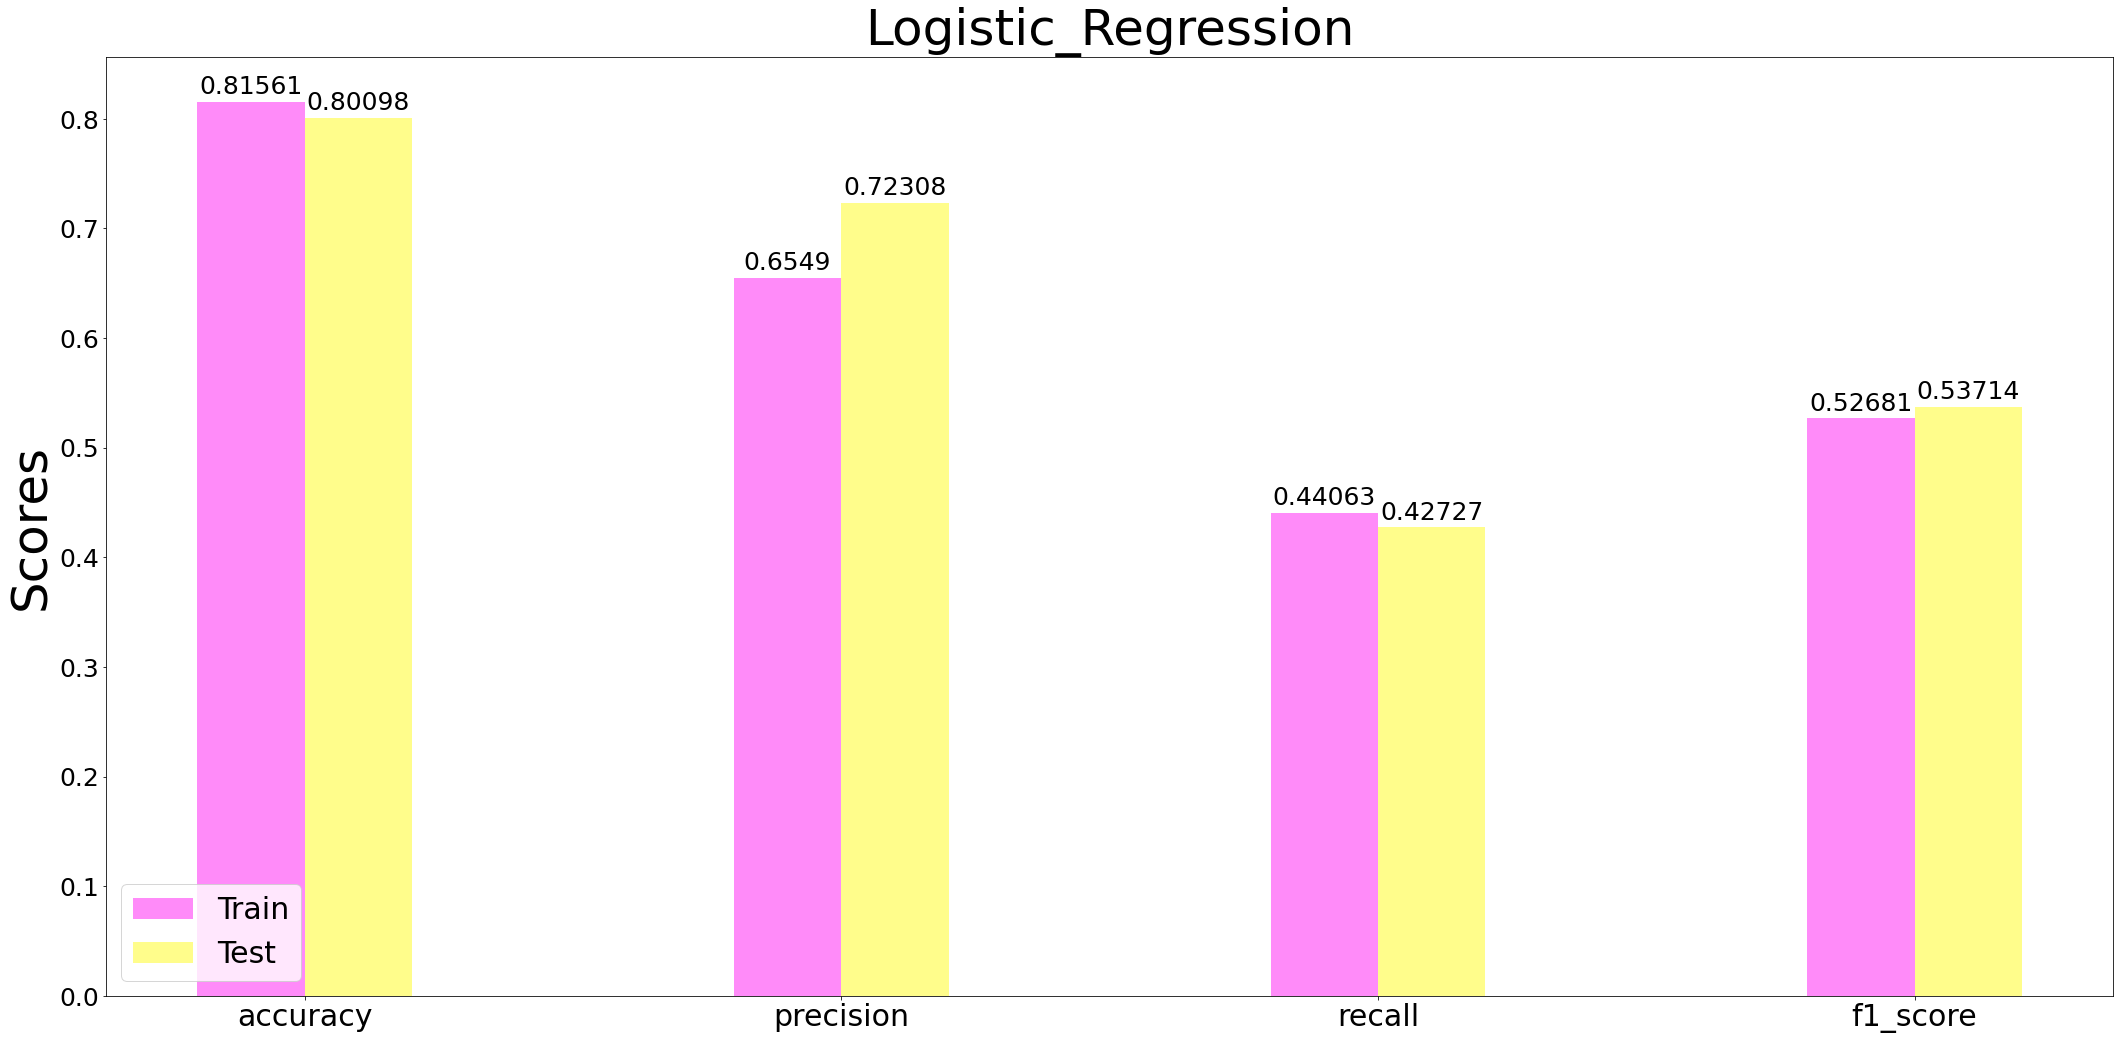

In [40]:
X_train, X_test, y_train, y_test=split_train_and_test(df_shooting,"Shooting Guard")

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


LR_clf = logistic_regression(X_scale_train, y_train)

LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')


LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
show_plot(category,LR_train,LR_test,'Logistic_Regression','#ff8bf9','#fffd8b')


<b>Decision Tree</b>


Best max depth is: 4 

Best min samples split: 5 

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,1120,128
Actual Positive,94,285


confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,267,30
Actual Positive,28,82


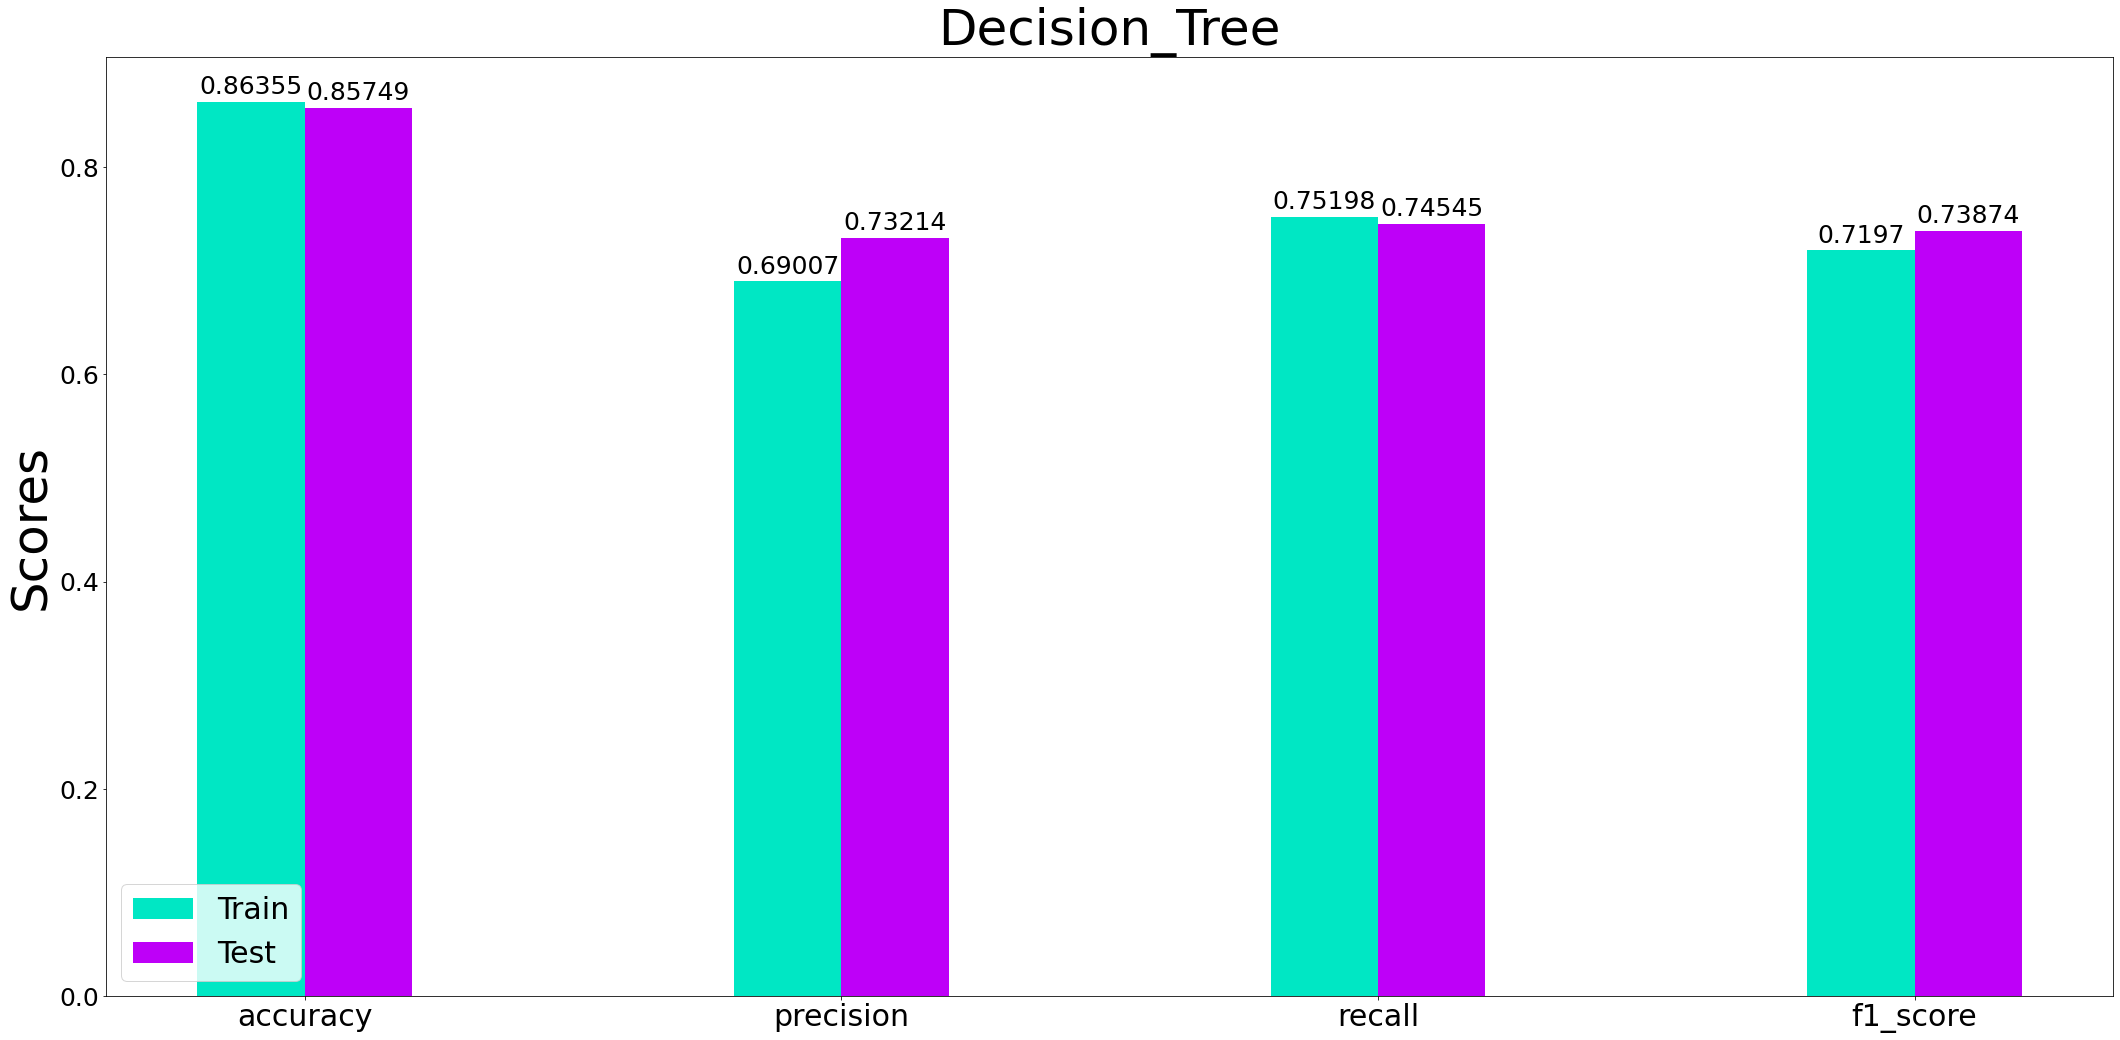

In [41]:
X_train, X_test, y_train, y_test=split_train_and_test(df_shooting,"Shooting Guard")

DT_clf = decision_tree(X_scale_train, y_train)

DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')


DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
show_plot(category,DT_train,DT_test,'Decision_Tree','#00e7c4','#be00f8')

<b>Models Comparison</b>


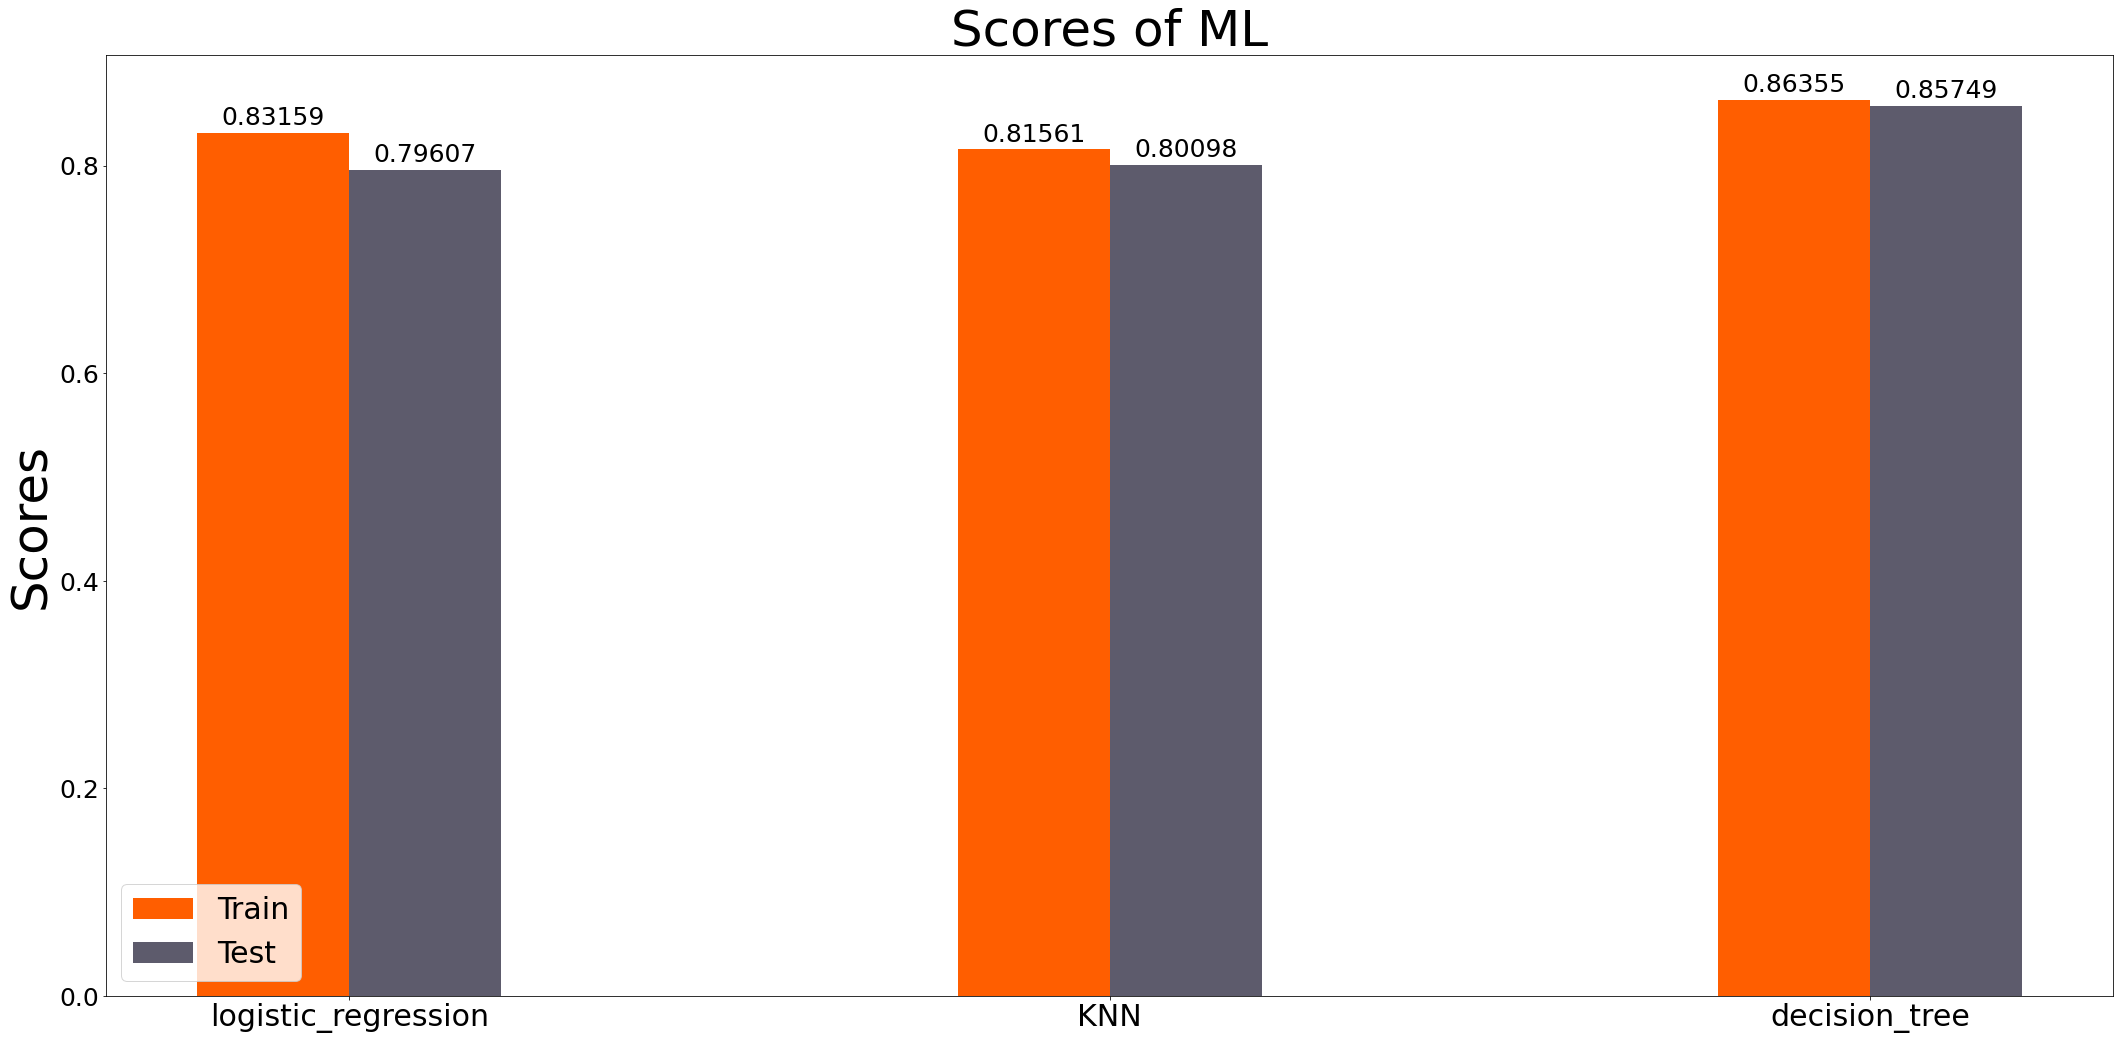

In [42]:
show_plot2(machine,train,test,'Scores of ML','#ff5e00','#5d5b6c')